# OLA


Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like

    Demographics (city, age, gender etc.)
    Tenure information (joining date, Last Date)
    Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)


Column Profiling:

    MMMM-YY : Reporting Date (Monthly)
    Driver_ID : Unique id for drivers
    Age : Age of the driver
    Gender : Gender of the driver – Male : 0, Female: 1
    City : City Code of the driver
    Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
    Income : Monthly average Income of the driver
    Date Of Joining : Joining date for the driver
    LastWorkingDate : Last date of working for the driver
    Joining Designation : Designation of the driver at the time of joining
    Grade : Grade of the driver at the time of reporting
    Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
    Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)




## Problem Statement

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

### Following are the analysis made in this notebook

- predicting Loan status using RFe selected features 

- Univariate and bivariate analysis

- Exploratory Data analaysis - data preprocesing , data cleaning , outlier detection and treatment

- Graphs like pairplots, distplot, heatmaps, boxplot, histogram to show the influence of features- independent variable and dependent variables

- Feature engineering, data visualization 

- ML model building with and without scaling the independent variables, With hyperparameter tuning

- ML model build using sklearn and stasmodel used in

- Finding the VIF using RFE, and selecting the best feature for selection

- Recommendations & Observations

In [578]:
#impoorting Libraties

import numpy as np
import numpy.random as rd
import pandas as pd
import matplotlib.pyplot as plt
import plotly as pt
import plotly.express as px
import seaborn as sbn
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
%config InlineBackend.figure_format ='retina'

#statastics 
from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind # T-test for independent samples
from scipy.stats import shapiro # Shapiro-Wilk’s test for Normality
from scipy.stats import levene # Levene's test for Equality of Variance
from scipy.stats import f_oneway # One-way ANOVA
from scipy.stats import chi2_contingency # Chi-square test of independence
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from matplotlib.ticker import FormatStrFormatter
import plotly.express as px
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot
from sklearn.metrics import roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn import preprocessing

from sklearn.model_selection import train_test_split


from scipy.stats import ttest_ind, f_oneway, kruskal # numeric Vs catogerical
from scipy.stats import chi2_contingency # categorical Vs categorical

# from scipy.stats import pearsonr, spearmanr # numeric Vs numeric

from scipy.stats import kstest # cdf

from scipy.stats import levene
from scipy.stats import norm
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.gofplots import qqplot_2samples, qqplot

from statsmodels.distributions.empirical_distribution import ECDF

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

In [579]:
#Import dataset
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv')

In [580]:
# Printing first 5 rows in dataframe
df.head(5)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [581]:
df.sample(5)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
2635,2635,10/01/19,402,45.0,0.0,C24,2,91279,29/11/15,NaN,1,3,711800,3
5655,5655,01/01/20,842,37.0,0.0,C18,1,121419,26/07/15,NaN,1,4,2678300,2
3519,3519,06/01/20,528,33.0,0.0,C10,0,51086,03/11/20,NaN,2,2,1590050,3
16432,16432,08/01/20,2430,27.0,0.0,C27,0,58259,13/04/20,29/07/20,2,2,0,1
2179,2179,02/01/20,341,39.0,0.0,C11,1,49592,24/12/19,NaN,2,2,0,1


In [582]:
# Shape of dataframe
df.shape

(19104, 14)

In [583]:
# Columns in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [584]:
# Finding any null values present in dataset
df.isnull().sum()

Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [585]:
# describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,19104.0,9551.500000,5.514994e+03,0.0,4775.75,9551.5,14327.25,19103.0
Driver_ID,19104.0,1415.591133,8.107053e+02,1.0,710.00,1417.0,2137.00,2788.0
Age,19043.0,34.668435,6.257912e+00,21.0,30.00,34.0,39.00,58.0
Gender,19052.0,0.418749,4.933670e-01,0.0,0.00,0.0,1.00,1.0
Education_Level,19104.0,1.021671,8.001671e-01,0.0,0.00,1.0,2.00,2.0
Income,19104.0,65652.025126,3.091452e+04,10747.0,42383.00,60087.0,83969.00,188418.0
Joining Designation,19104.0,1.690536,8.369837e-01,1.0,1.00,1.0,2.00,5.0
Grade,19104.0,2.252670,1.026512e+00,1.0,1.00,2.0,3.00,5.0
Total Business Value,19104.0,571662.074958,1.128312e+06,-6000000.0,0.00,250000.0,699700.00,33747720.0
Quarterly Rating,19104.0,2.008899,1.009832e+00,1.0,1.00,2.0,3.00,4.0


In [586]:
df.nunique().sort_values()

Gender                      2
Education_Level             3
Quarterly Rating            4
Joining Designation         5
Grade                       5
MMM-YY                     24
City                       29
Age                        36
LastWorkingDate           493
Dateofjoining             869
Driver_ID                2381
Income                   2383
Total Business Value    10181
Unnamed: 0              19104
dtype: int64

In [587]:
#Check for duplicates
df.duplicated().sum()

0

In [588]:
#Category columns
category_columns=df.dtypes=="O"
cat_cols= category_columns[category_columns].index
cat_cols

Index(['MMM-YY', 'City', 'Dateofjoining', 'LastWorkingDate'], dtype='object')

In [589]:
#Numerical columns
category_columns=df.dtypes!="O"
num_cols= category_columns[category_columns].index
num_cols

Index(['Unnamed: 0', 'Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

## Value Count in dataset

In [590]:
columns = ['MMM-YY', 'City', 'Dateofjoining', 'LastWorkingDate','Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating']
for col in columns:
  print("Value Counts in", col)
  print("")
  print(df[col].value_counts())
  print("-------"*20)

Value Counts in MMM-YY

01/01/19    1022
02/01/19     944
03/01/19     870
12/01/20     819
10/01/20     818
08/01/20     812
09/01/20     809
07/01/20     806
11/01/20     805
12/01/19     795
04/01/19     794
01/01/20     782
11/01/19     781
06/01/20     770
05/01/20     766
05/01/19     764
09/01/19     762
02/01/20     761
07/01/19     757
08/01/19     754
10/01/19     739
04/01/20     729
06/01/19     726
03/01/20     719
Name: MMM-YY, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------
Value Counts in City

C20    1008
C29     900
C26     869
C22     809
C27     786
C15     761
C10     744
C12     727
C8      712
C16     709
C28     683
C1      677
C6      660
C5      656
C14     648
C3      637
C24     614
C7      609
C21     603
C25     584
C19     579
C4      578
C13     569
C18     544
C23     538
C9      520
C2      472
C11     468
C17     440
Name: City, dtype: int64
-----

## Removing the unnecesary columns

In [591]:
df.drop(columns=['Unnamed: 0'],inplace=True)

## Casting datatype of columns

In [592]:
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['Reporting_Date'] = pd.to_datetime(df['MMM-YY'])
df.drop(columns=['MMM-YY'],inplace=True)

## Missing value imputation

In [593]:
##missing values in dataset

missing_values = pd.DataFrame({'Number of Missing Values':list(df.isnull().sum().values),
                               'Percentage of Missing Values':list(((df.isnull().sum()/len(df))*100).values)},
                                index=list(df.columns))
missing_values

,Number of Missing Values,Percentage of Missing Values
Driver_ID,0,0.000000
Age,61,0.319305
Gender,52,0.272194
City,0,0.000000
Education_Level,0,0.000000
Income,0,0.000000
Dateofjoining,0,0.000000
LastWorkingDate,17488,91.541039
Joining Designation,0,0.000000
Grade,0,0.000000


In [594]:
df['Age']=df['Age'].fillna(method='ffill')
df['Gender']=df['Gender'].fillna(method='ffill')

In [595]:
##missing values in after mssing value imputation

missing_values = pd.DataFrame({'Number of Missing Values':list(df.isnull().sum().values),
                               'Percentage of Missing Values':list(((df.isnull().sum()/len(df))*100).values)},
                                index=list(df.columns))
missing_values

,Number of Missing Values,Percentage of Missing Values
Driver_ID,0,0.000000
Age,0,0.000000
Gender,0,0.000000
City,0,0.000000
Education_Level,0,0.000000
Income,0,0.000000
Dateofjoining,0,0.000000
LastWorkingDate,17488,91.541039
Joining Designation,0,0.000000
Grade,0,0.000000


In [596]:
#Numerical columns
category_columns=df.dtypes!="O"
num_cols= category_columns[category_columns].index
num_cols

Index(['Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income',
       'Dateofjoining', 'LastWorkingDate', 'Joining Designation', 'Grade',
       'Total Business Value', 'Quarterly Rating', 'Reporting_Date'],
      dtype='object')

## Aggregation of Columns 

WE Aggregate columns , due to multiple deiver id , present in the data

In [597]:
df=df.groupby('Driver_ID')[df.columns].last()

## Encoding


In [598]:
df['Gender']= df['Gender'].apply(lambda x : 0 if x==0.0 else 1)

In [599]:
df['Gender'].value_counts()

0    1404
1     977
Name: Gender, dtype: int64

In [600]:
df.columns

Index(['Driver_ID', 'Age', 'Gender', 'City', 'Education_Level', 'Income',
       'Dateofjoining', 'LastWorkingDate', 'Joining Designation', 'Grade',
       'Total Business Value', 'Quarterly Rating', 'Reporting_Date'],
      dtype='object')

## Outlier Treatment

Text(0.5, 1.0, 'Boxplot')

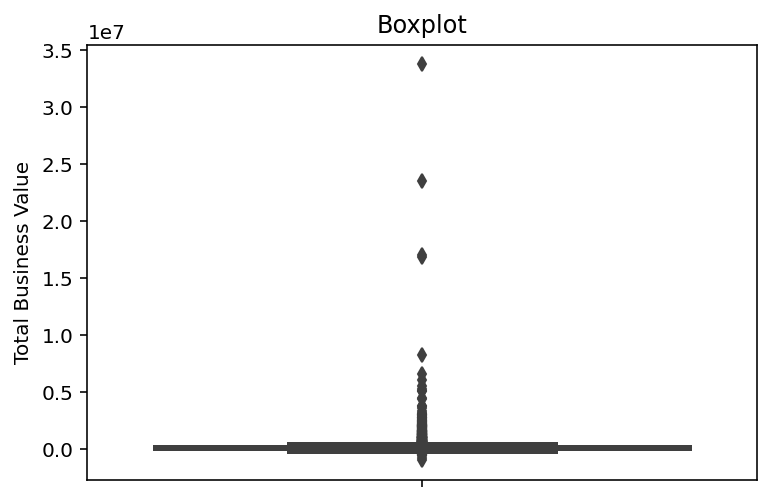

In [601]:
sbn.boxplot(y=df['Total Business Value'])
plt.title('Boxplot')
plt.show()

Text(0.5, 1.0, 'Boxplot')

<function matplotlib.pyplot.show(*args, **kw)>

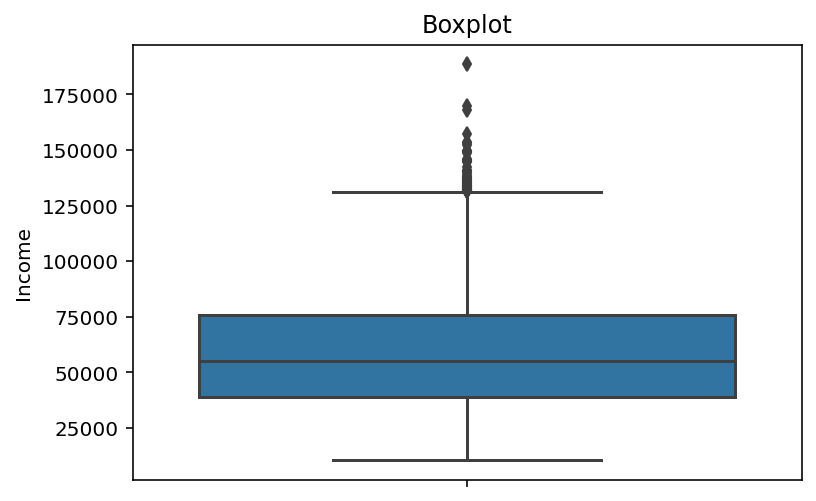

In [602]:
sbn.boxplot(y=df['Income'])
plt.title('Boxplot')
plt.show

In [603]:
df.shape

(2381, 13)

In [604]:
# Outlier Treatment using IQR -

q1 = df['Total Business Value'].quantile(0.25)
q3 = df['Total Business Value'].quantile(0.75)
iqr = q3-q1
fd = df[(df['Total Business Value']>(q1-1.5*iqr) ) & (df['Total Business Value']<(q3+1.5*iqr))]
#or
#dfn.loc[dfn['count']<(q1-1.5*iqr), 'count']= q1-1.5*iqr
#dfn.loc[dfn['count']>(q3+1.5*iqr), 'count']= q3+1.5*iqr
print("No. of rows : ", fd.shape[0])

No. of rows :  2009


In [605]:
sd= df.copy()

## Correlation using Heatmap

In [606]:
## Heatmap
df_copy = df.copy().corr()
fig = px.imshow(df_copy, text_auto=True, width=1500, height=800)
fig.show()

From the above the heatmap, we can clearly see tha the Quarterly Rating is totally dependednt on the Total Business value. And also we can see that the Grade is correlated to Joining Designation and income. And Income is correlated to Education level

In [607]:
cat_cols

Index(['MMM-YY', 'City', 'Dateofjoining', 'LastWorkingDate'], dtype='object')

## Univariate Analysis

In [608]:
df.columns

Index(['Driver_ID', 'Age', 'Gender', 'City', 'Education_Level', 'Income',
       'Dateofjoining', 'LastWorkingDate', 'Joining Designation', 'Grade',
       'Total Business Value', 'Quarterly Rating', 'Reporting_Date'],
      dtype='object')

<Figure size 1008x3600 with 0 Axes>

j=elks:: 0


Text(0.5, 1.0, 'Income')

Text(0.5, 1.0, 'Income Spread')

j=elks:: 1


Text(0.5, 1.0, 'Education_Level')

Text(0.5, 1.0, 'Education_Level Spread')

j=elks:: 2


Text(0.5, 1.0, 'Quarterly Rating')

Text(0.5, 1.0, 'Quarterly Rating Spread')

j=elks:: 3


Text(0.5, 1.0, 'Total Business Value')

Text(0.5, 1.0, 'Total Business Value Spread')

j=elks:: 4


Text(0.5, 1.0, 'Age')

Text(0.5, 1.0, 'Age Spread')

j=elks:: 5


Text(0.5, 1.0, 'Grade')

Text(0.5, 1.0, 'Grade Spread')

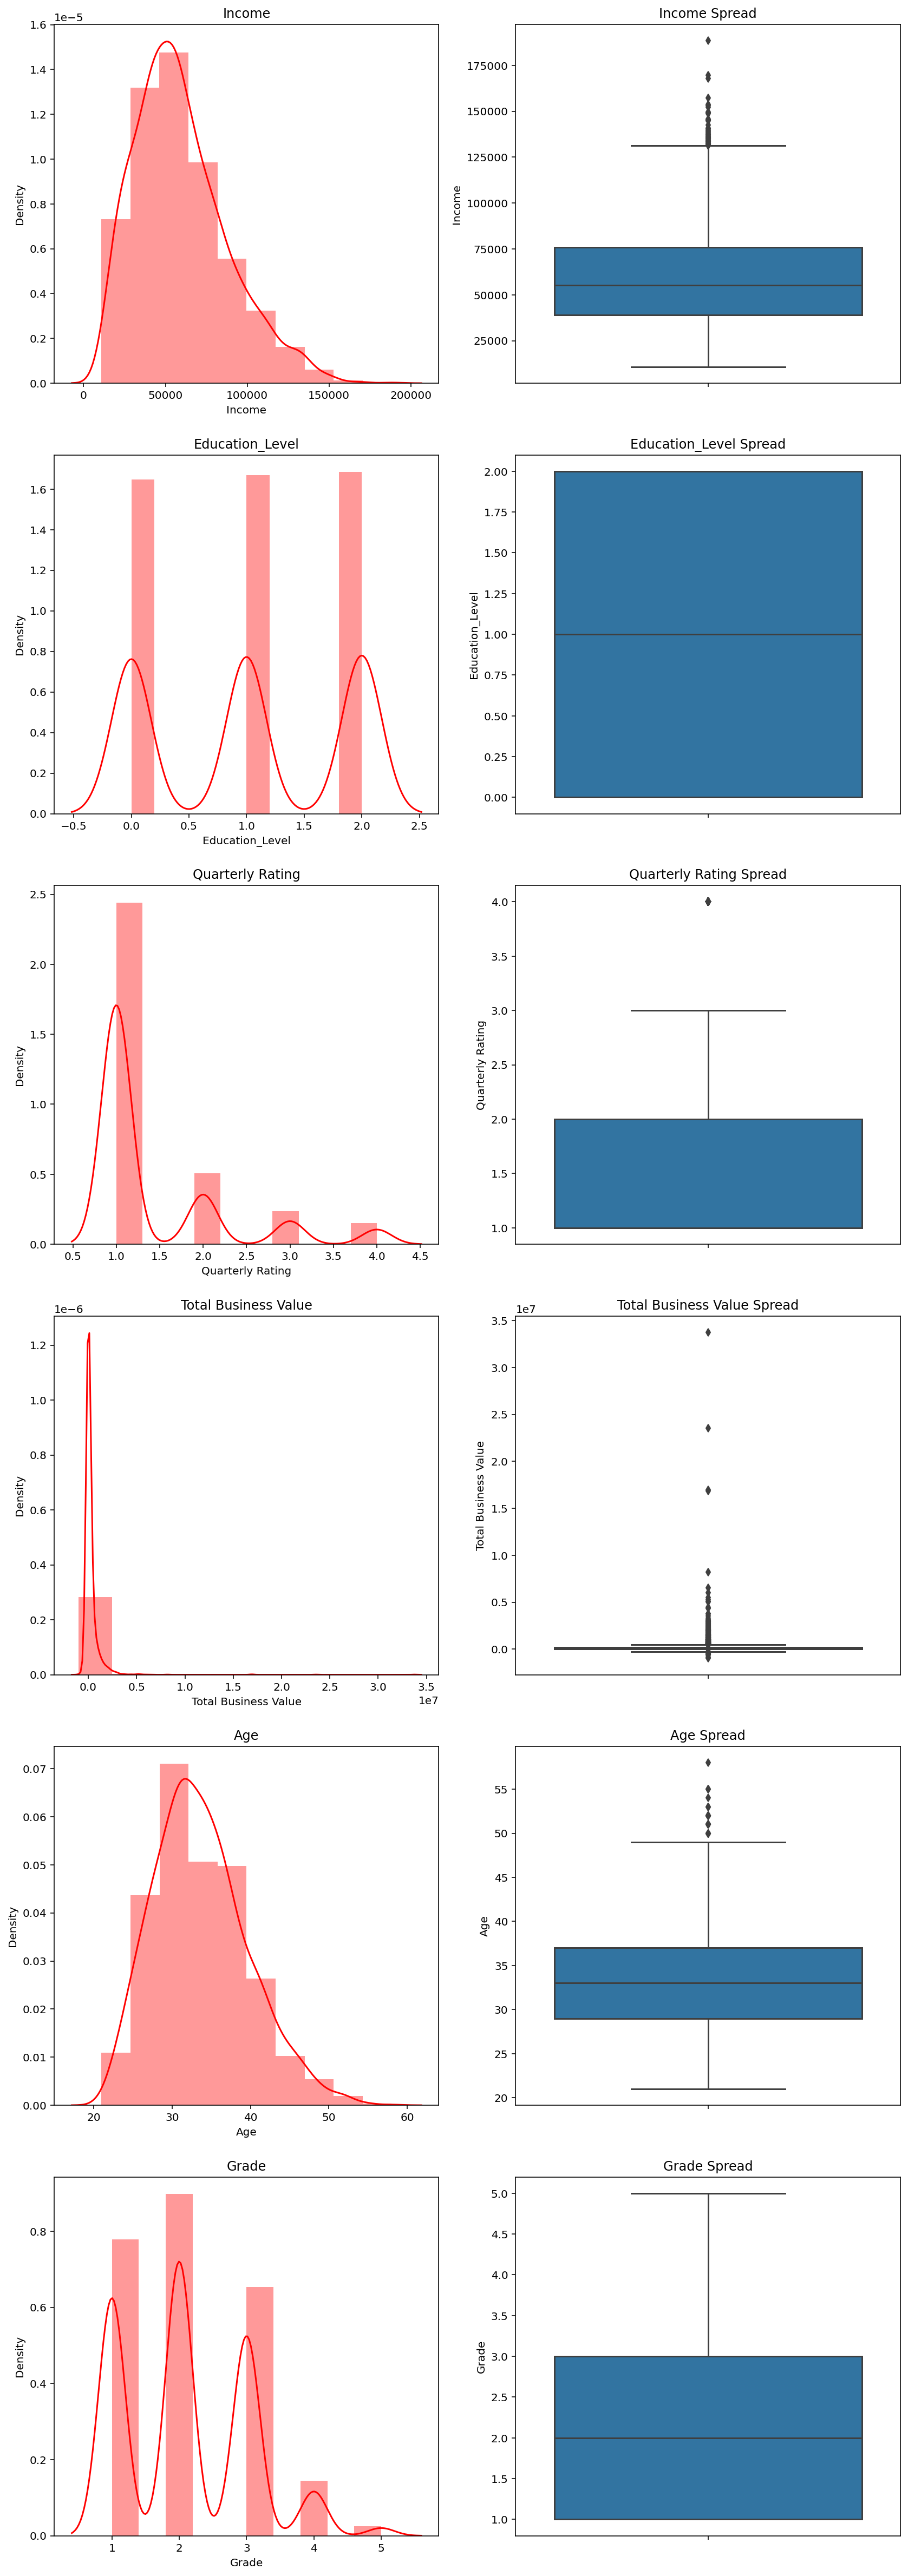

In [609]:
plt.figure(figsize=(14, 50))

cols=['Income', 'Education_Level', 'Quarterly Rating',
       'Total Business Value', 'Age', 'Grade']
i=0
for j in range(len(cols)):
  for f in range(2):
    i=i+1
    if i==15:
      break
    elif i %2 !=0:
      print("j=elks::",j)
      plt.subplot(7, 2, i)
      sns.distplot(df[cols[j]],bins=10, color ='red' ,kde=True)
      plt.title(cols[j])
    else:
      plt.subplot(7, 2, i)
      plt.title(cols[j] + ' Spread')
      sns.boxplot(y=df[cols[j]])

## Bivariate Analaysis

## Education vs Gender

Gender,0,1,All
Education_Level,,,
0,461,323,784
1,463,332,795
2,480,322,802
All,1404,977,2381


Text(0.5, 0, 'Education_Level')

Text(0, 0.5, 'Gender')

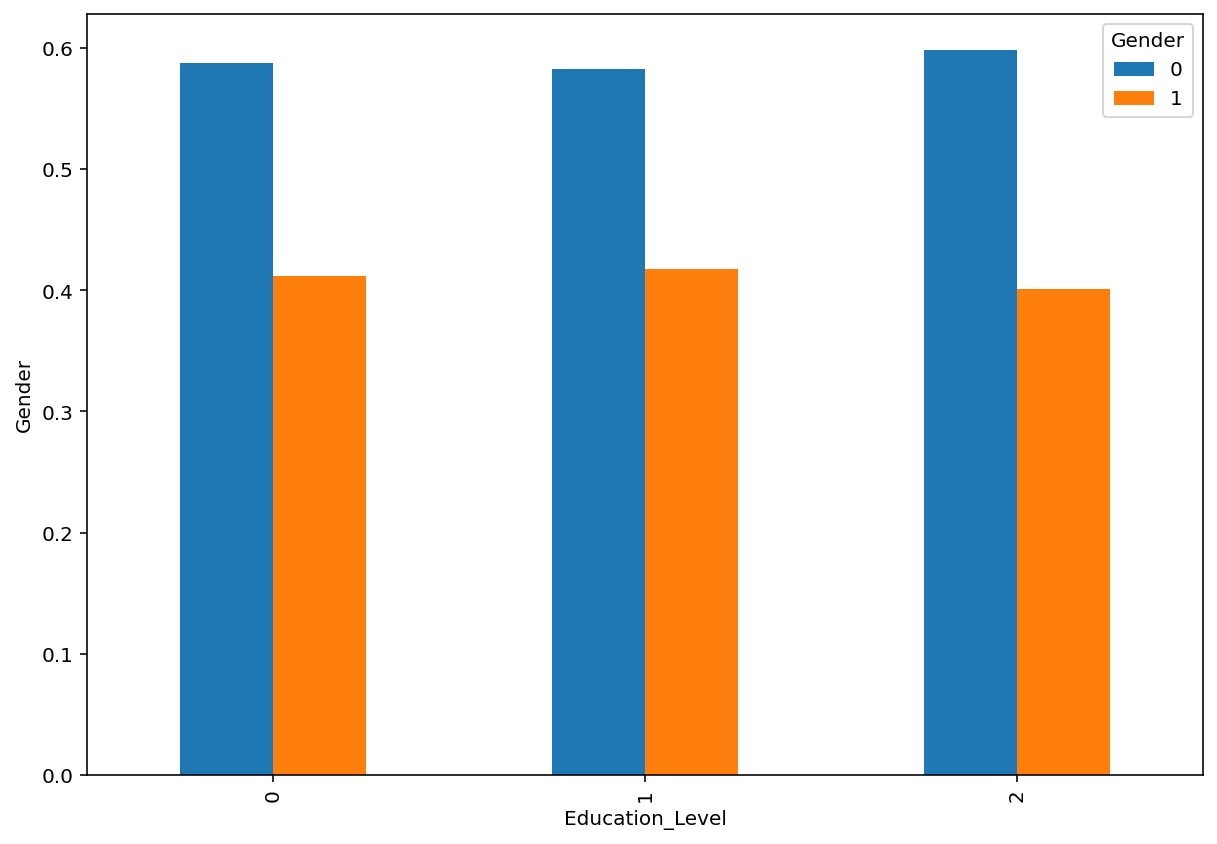

In [610]:

#Cross tab 
pd.crosstab(df['Education_Level'],columns=df['Gender'], margins=True)
print()
print()
totalcount=pd.crosstab(df['Education_Level'],columns=df['Gender'], normalize='index')
totalcount.plot(kind='bar',figsize=(10,7))
plt.xlabel("Education_Level")
plt.ylabel("Gender")
plt.show()

We can see that the Gender 0 has higher education levl

### Grade vs Gender

Gender,0,1,All
Grade,,,
1,434,307,741
2,507,348,855
3,367,256,623
4,82,56,138
5,14,10,24
All,1404,977,2381


Text(0.5, 0, 'Grade')

Text(0, 0.5, 'Gender')

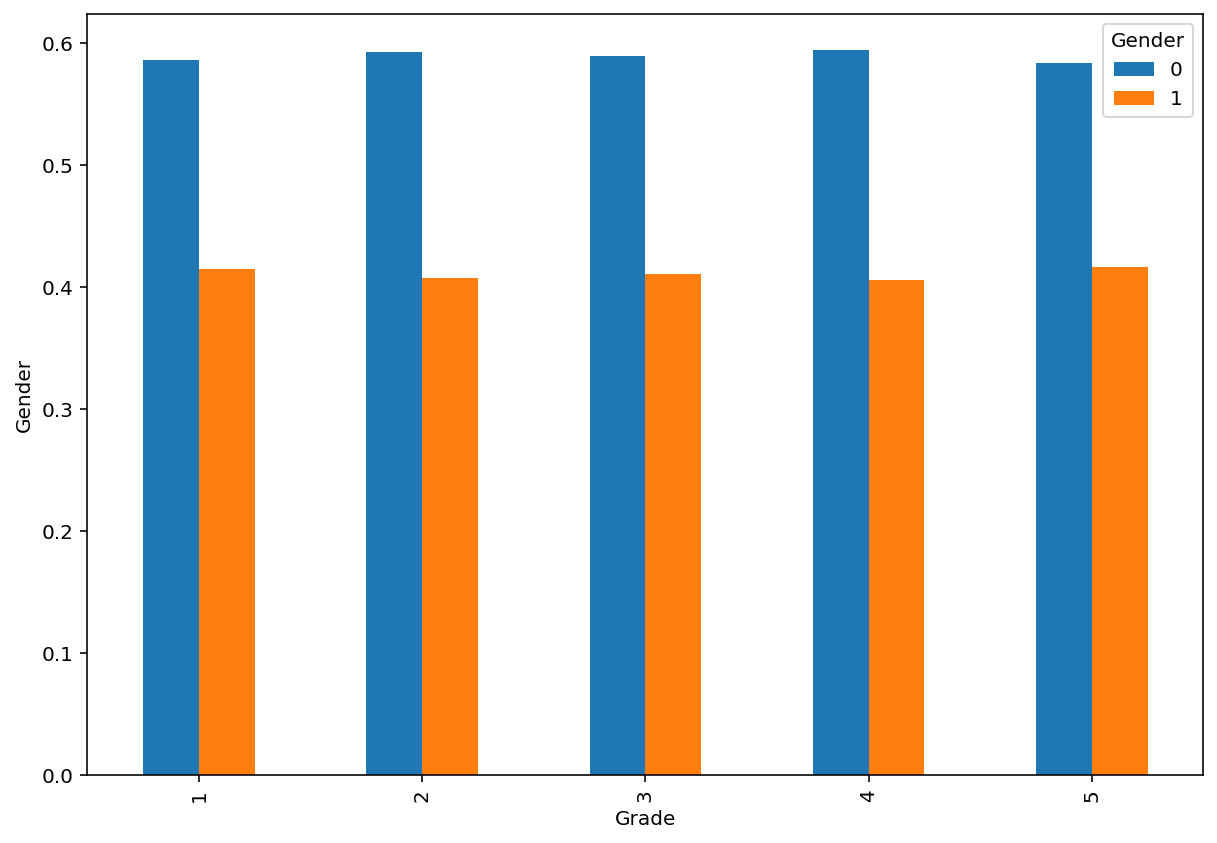

In [611]:

#Cross tab 
pd.crosstab(df['Grade'],columns=df['Gender'], margins=True)
print()
print()
totalcount=pd.crosstab(df['Grade'],columns=df['Gender'], normalize='index')
totalcount.plot(kind='bar',figsize=(10,7))
plt.xlabel("Grade")
plt.ylabel("Gender")
plt.show()

Grade,1,2,3,4,5,All
Income,,,,,,
10747,0,1,0,0,0,1
10883,1,0,0,0,0,1
11068,1,0,0,0,0,1
11236,1,0,0,0,0,1
11706,1,0,0,0,0,1
...,...,...,...,...,...,...
157124,0,0,1,0,0,1
167758,0,0,0,0,1,1
169549,0,0,0,0,1,1


Text(0.5, 0, 'Income')

Text(0, 0.5, 'Grade')

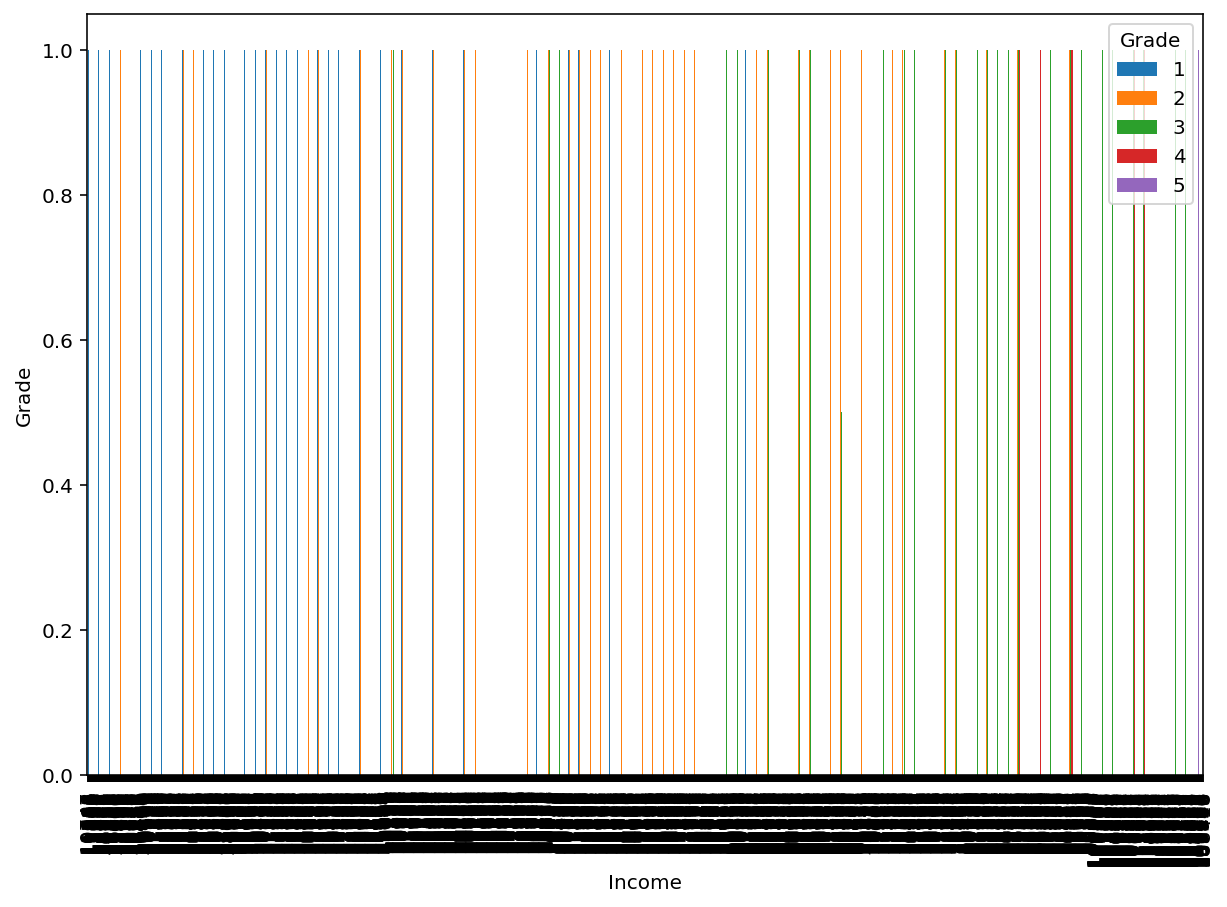

In [612]:

#Cross tab 
pd.crosstab(df['Income'],columns=df['Grade'], margins=True)
print()
print()
totalcount=pd.crosstab(df['Income'],columns=df['Grade'], normalize='index')
totalcount.plot(kind='bar',figsize=(10,7))
plt.xlabel("Income")
plt.ylabel("Grade")
plt.show()

## Creating Target Variable

We need to create a target Variable , We need to check , the Lastworkingday , if the data ie present , then 1 else 0

In [613]:
df['target']=df['LastWorkingDate'].isna()
df['target']= df['target'].apply(lambda x: 0 if x==True else 1)

### To check the churn vs income 

Education_Level,0,1,2,All
target,,,,
0,242,268,255,765
1,542,527,547,1616
All,784,795,802,2381


Text(0.5, 0, 'target')

Text(0, 0.5, 'Education_Level')

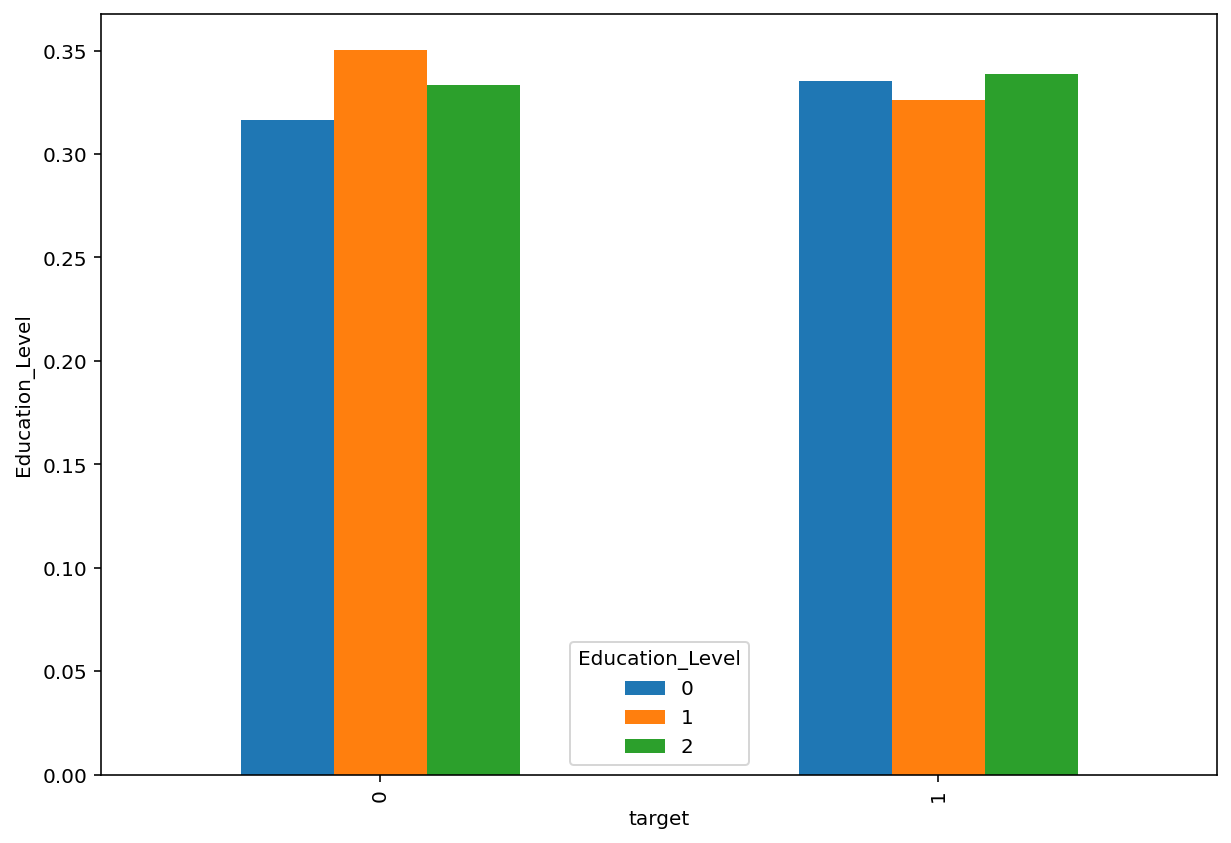

In [614]:

#Cross tab 
pd.crosstab(df['target'],columns=df['Education_Level'], margins=True)
print()
print()
totalcount=pd.crosstab(df['target'],columns=df['Education_Level'], normalize='index')
totalcount.plot(kind='bar',figsize=(10,7))
plt.xlabel("target")
plt.ylabel("Education_Level")
plt.show()

### Churn vs

Gender,0,1,All
target,,,
0,456,309,765
1,948,668,1616
All,1404,977,2381


Text(0.5, 0, 'target')

Text(0, 0.5, 'Gender')

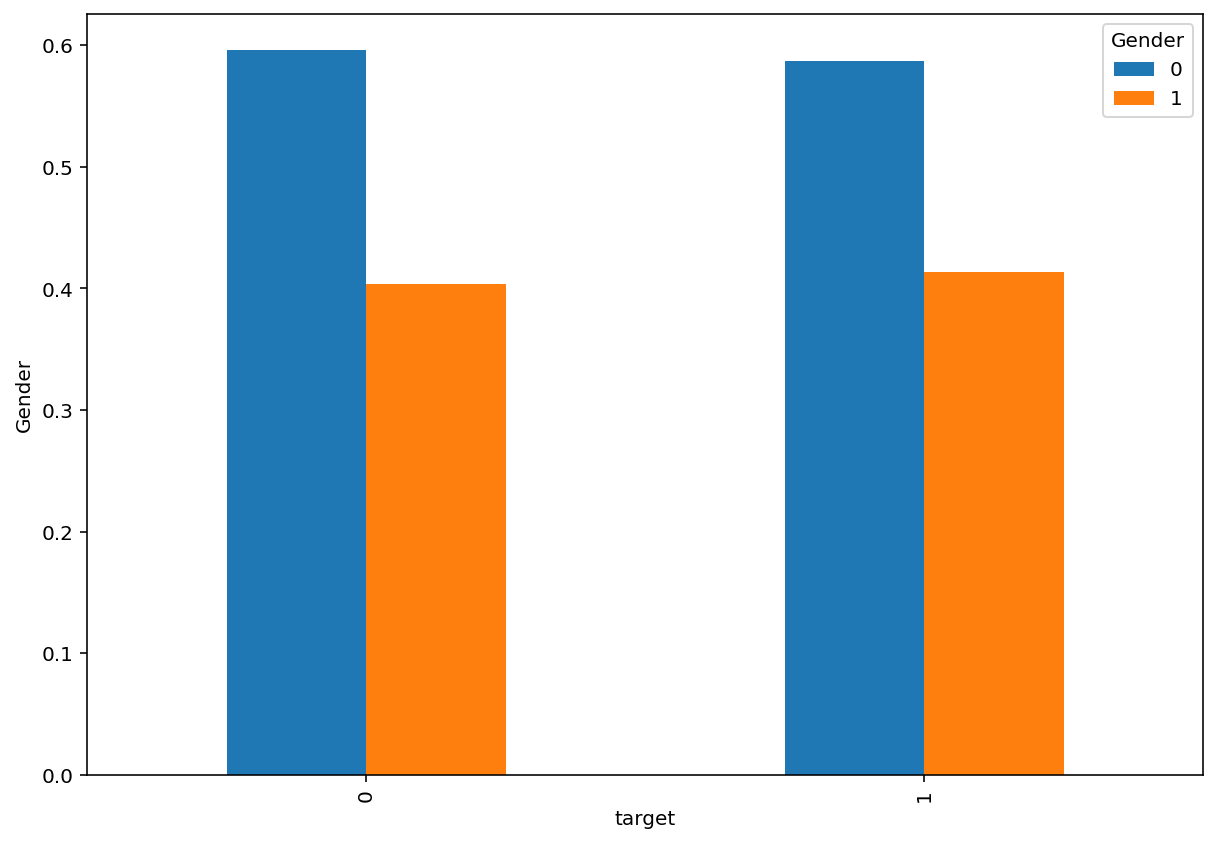

In [615]:

#Cross tab 
pd.crosstab(df['target'],columns=df['Gender'], margins=True)
print()
print()
totalcount=pd.crosstab(df['target'],columns=df['Gender'], normalize='index')
totalcount.plot(kind='bar',figsize=(10,7))
plt.xlabel("target")
plt.ylabel("Gender")
plt.show()

### Churn vs Quarterly Rating

Quarterly Rating,1,2,3,4,All
target,,,,,
0,312,216,140,97,765
1,1432,146,28,10,1616
All,1744,362,168,107,2381


Text(0.5, 0, 'target')

Text(0, 0.5, 'Quarterly Rating')

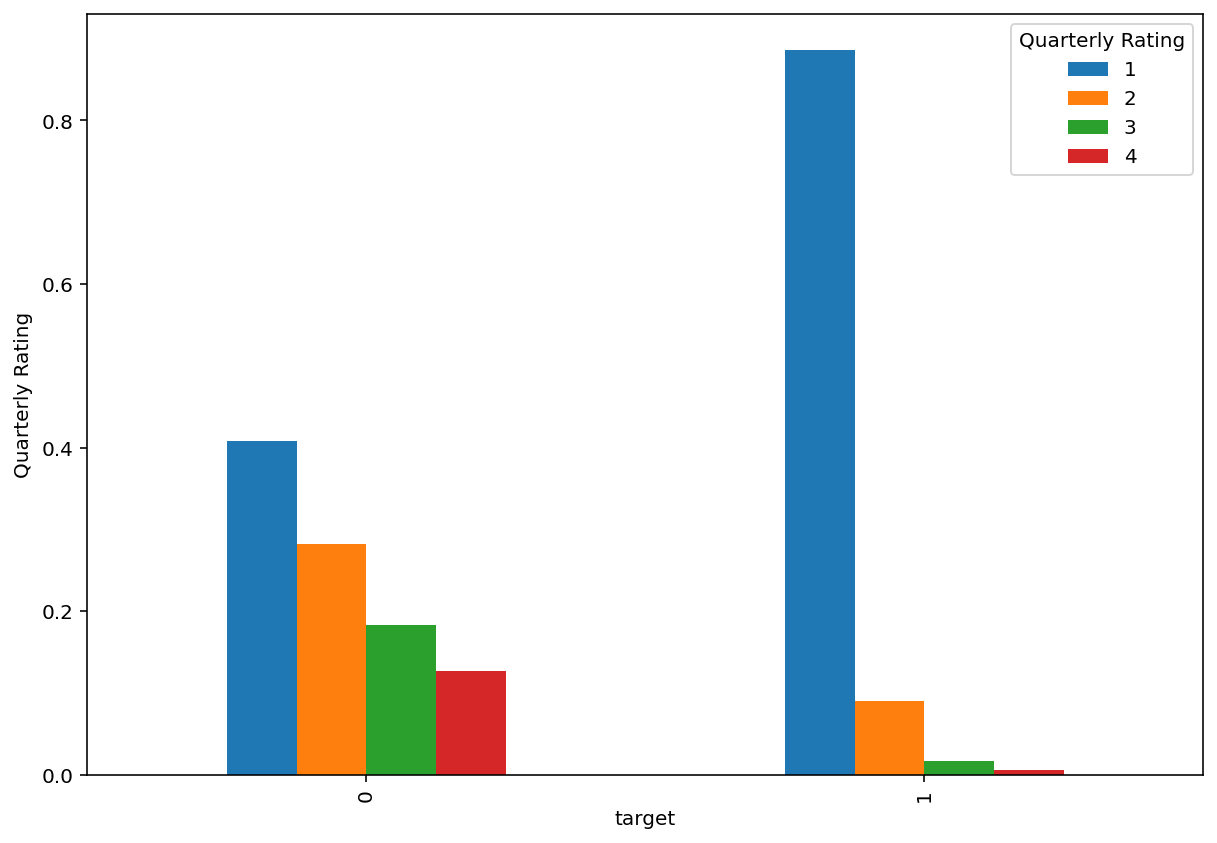

In [616]:

#Cross tab 
pd.crosstab(df['target'],columns=df['Quarterly Rating'], margins=True)
print()
print()
totalcount=pd.crosstab(df['target'],columns=df['Quarterly Rating'], normalize='index')
totalcount.plot(kind='bar',figsize=(10,7))
plt.xlabel("target")
plt.ylabel("Quarterly Rating")
plt.show()

We can see from the above that the Quarterly rating of 1  has more chances of Churn , and the Rating of 4 has less chance of Churn

### Churn vs joining Designation

Joining Designation,1,2,3,4,5,All
target,,,,,,
0,274,255,219,14,3,765
1,752,560,274,22,8,1616
All,1026,815,493,36,11,2381


Text(0.5, 0, 'target')

Text(0, 0.5, 'Joining Designation')

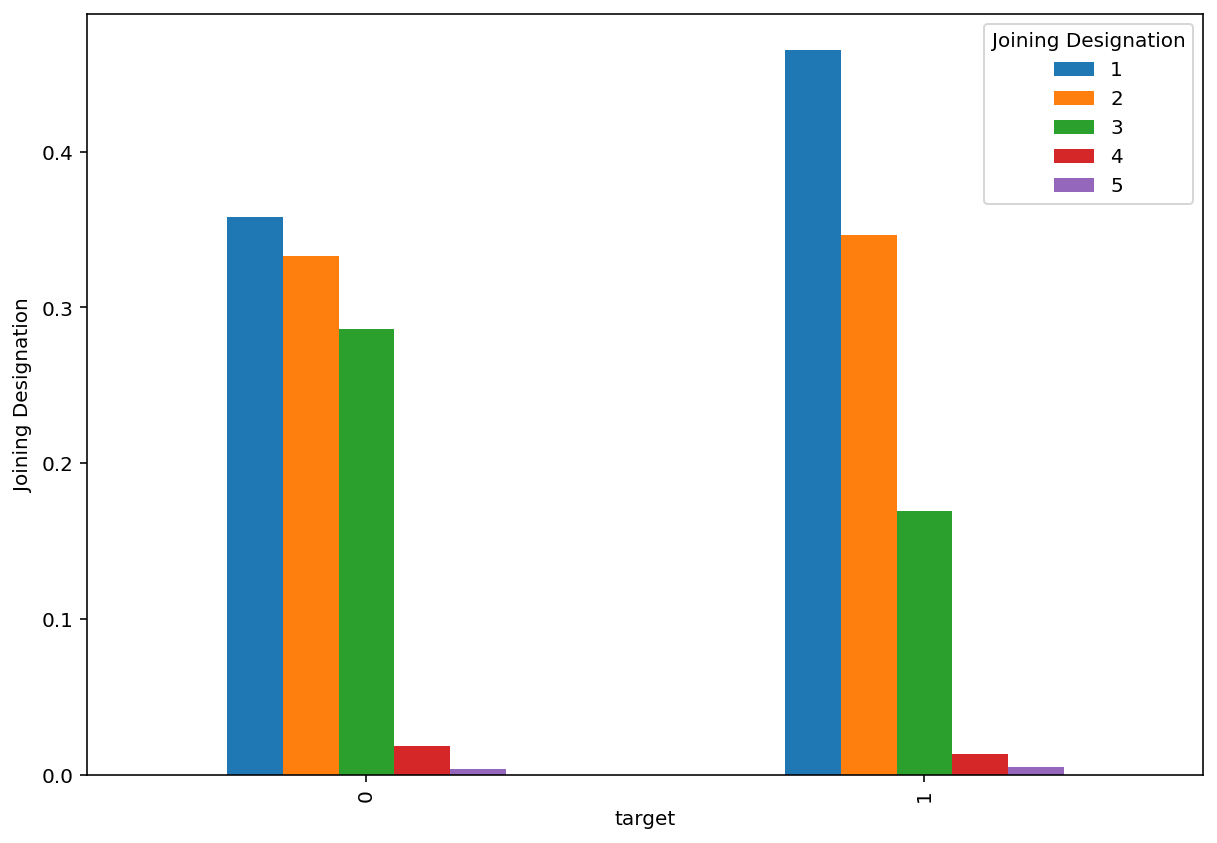

In [617]:

#Cross tab 
pd.crosstab(df['target'],columns=df['Joining Designation'], margins=True)
print()
print()
totalcount=pd.crosstab(df['target'],columns=df['Joining Designation'], normalize='index')
totalcount.plot(kind='bar',figsize=(10,7))
plt.xlabel("target")
plt.ylabel("Joining Designation")
plt.show()

We can clearly see , that the joining Designation of 1 has high churn and less for 5- joining designation

### Churn vs Education

Education_Level,0,1,2,All
target,,,,
0,242,268,255,765
1,542,527,547,1616
All,784,795,802,2381


Text(0.5, 0, 'target')

Text(0, 0.5, 'Education_Level')

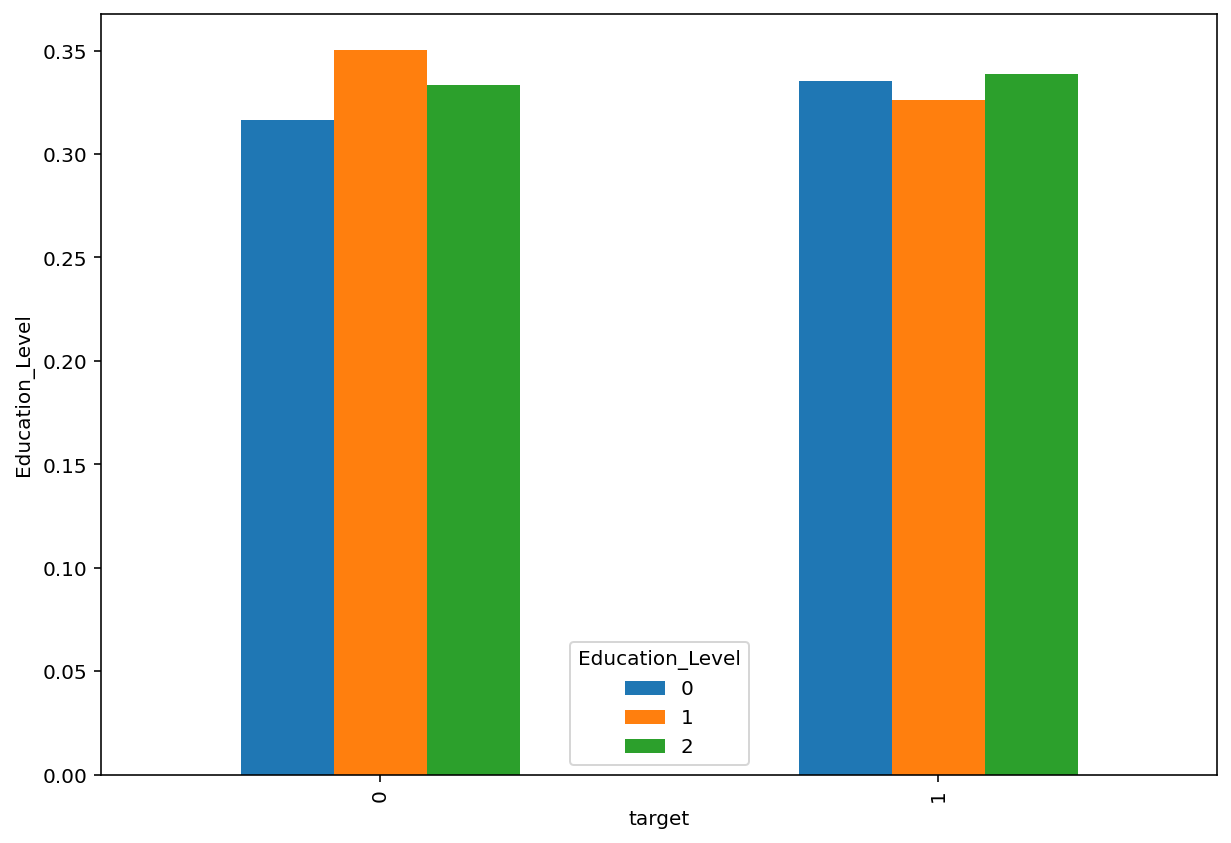

In [618]:

#Cross tab 
pd.crosstab(df['target'],columns=df['Education_Level'], margins=True)
print()
print()
totalcount=pd.crosstab(df['target'],columns=df['Education_Level'], normalize='index')
totalcount.plot(kind='bar',figsize=(10,7))
plt.xlabel("target")
plt.ylabel("Education_Level")
plt.show()

### Churn vs City

City,C1,C10,C11,C12,C13,C14,C15,C16,C17,C18,...,C28,C29,C3,C4,C5,C6,C7,C8,C9,All
target,,,,,,,,,,,,,,,,,,,,,
0,24,25,19,28,13,21,32,34,16,25,...,23,45,30,25,32,23,24,36,22,765
1,56,61,45,53,58,58,69,50,55,44,...,59,51,52,52,48,55,52,53,53,1616
All,80,86,64,81,71,79,101,84,71,69,...,82,96,82,77,80,78,76,89,75,2381


Text(0.5, 0, 'target')

Text(0, 0.5, 'City')

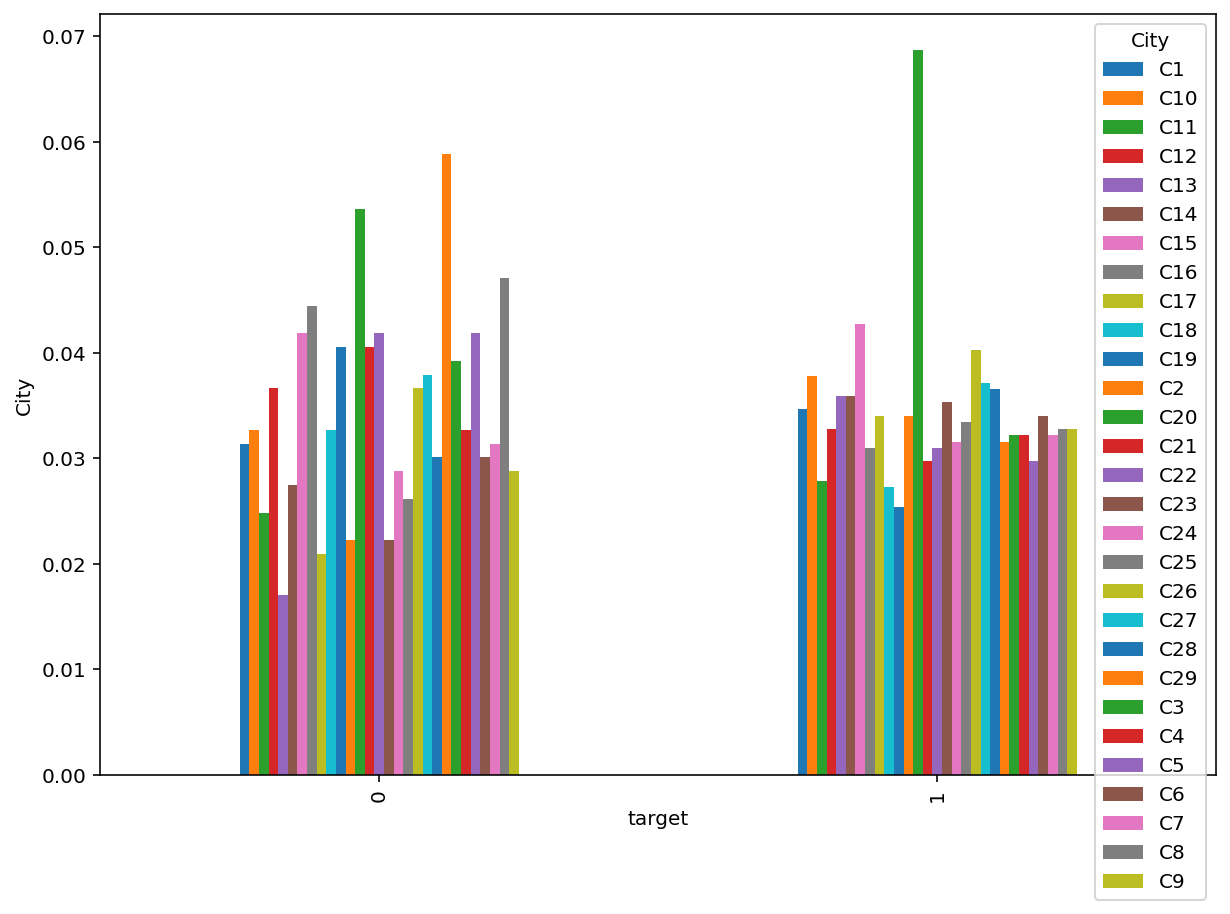

In [619]:

#Cross tab 
pd.crosstab(df['target'],columns=df['City'], margins=True)
print()
print()
totalcount=pd.crosstab(df['target'],columns=df['City'], normalize='index')
totalcount.plot(kind='bar',figsize=(10,7))
plt.xlabel("target")
plt.ylabel("City")
plt.show()

## Encoding the City 

In [620]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['City_en'] = labelencoder.fit_transform(df['City'])
df=df.drop(columns=['City'])

## Knn Imputation

Since , we dont have the null values present in dataset , to be computed using Knn Imputer , so we dont need to use KNN imputation

We can see that the C20 city type has more churn rate and less for C19

## Feature Engineering

In [621]:
%%script false --no-raise-error
## Removing the date columns

df['days_worked']= (df['LastWorkingDate']-df['Dateofjoining']).dt.days

## To impute the missing columns we add 0 to the data , if the employee churned , then the Days_worked has value , else 0
df['days_worked'].fillna(0,inplace=True)

## Casting
df['days_worked']=df['days_worked'].astype(int)


df['Days_worked']= df['Days_worked'].apply(lambda x: 0 if x.isna() else x)

## Function to check the Scores

In [622]:
def get_test_scores(model,proba,X_test,y_test):
    pred = model.predict(X_test)
    scores = {'Accuracy':round(accuracy_score(y_test,pred),2),
              'Precision':round(precision_score(y_test,pred,average='macro'),2),
              'Recall':round(recall_score(y_test,pred,average='macro'),2),
              'f1-Score':round(f1_score(y_test,pred,average='macro'),2),
              'Kappa Score': round(cohen_kappa_score(y_test,pred),2),
              'ROC-AUC Socre':round(roc_auc_score(y_test,proba),2)
             }
    return scores
def get_cv_scores(model,proba,X_cv,y_cv):
    pred = model.predict(X_cv)
    roc=roc_auc_score(y_test, model.predict(X_test))
    scores = {'Accuracy':round(accuracy_score(y_cv,pred),2),
              'Precision':round(precision_score(y_cv,pred,average='macro'),2),
              'Recall':round(recall_score(y_cv,pred,average='macro'),2),
              'f1-Score':round(f1_score(y_cv,pred,average='macro'),2),
              'Kappa Score': round(cohen_kappa_score(y_cv,pred),2),
              'ROC-AUC Socre':round(roc_auc_score(y_cv,proba),2)
             }
    return scores
def get_train_scores(train_model,proba,X_train,y_train):
    pred = train_model.predict(X_train)
    
    scores = {'Accuracy':round(accuracy_score(y_train,pred),2),
              'Precision':round(precision_score(y_train,pred,average='macro'),2),
              'Recall':round(recall_score(y_train,pred,average='macro'),2),
              'f1-Score':round(f1_score(y_train,pred,average='macro'),2),
              'Kappa Score': round(cohen_kappa_score(y_train,pred),2),
              'ROC-AUC Socre':round(roc_auc_score(y_train,proba),2)
             }
    return scores

## Checking Variance influence factor for numerical variables

In [623]:
vif = pd.DataFrame()
num_column =[ 'Age', 'Gender', 'Education_Level', 'Income',
      'Joining Designation', 'Grade',
       'Total Business Value', 'Quarterly Rating']

vif['VIF_Factor'] = [variance_inflation_factor(dff[num_column].values,i)  for  i in range(dff[num_column].shape[1])]
vif['Features'] = dff[num_column].columns
vif.sort_values('VIF_Factor',ascending=False).reset_index(drop=True)

,VIF_Factor,Features
0,23.373325,Grade
1,13.580378,Income
2,12.512147,Age
3,10.870390,Joining Designation
4,5.653795,Quarterly Rating
5,2.419290,Education_Level
6,1.574026,Total Business Value
7,1.528112,Gender


From above, we can verify that the high influenced featurtes like Grade , Income, Joining Designation, Age should be removed

## class imbalance

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Count of Numerical and Categorical Features')

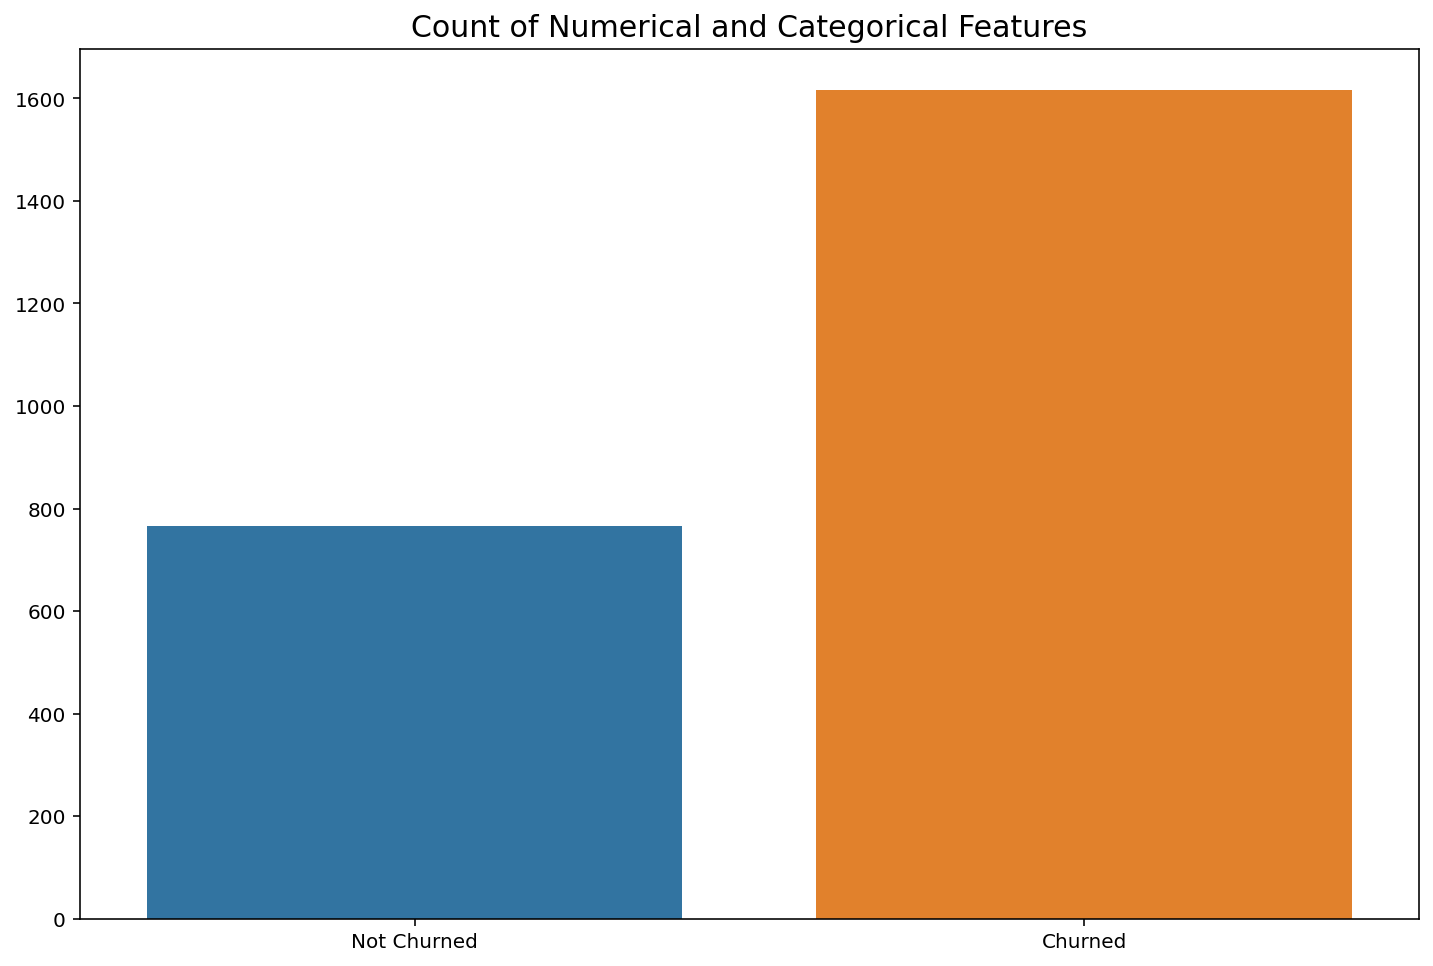

In [624]:
plt.figure(figsize=(12,8))
sns.barplot(x = ['Not Churned','Churned'],y=[len(df[df['target']==0]),len(df[df['target']==1])])
plt.title('Count of Numerical and Categorical Features',fontsize=15)
plt.show()

In [625]:
from imblearn.over_sampling import SMOTE
# Separate input features and target variable
x=df[num_column]
y= df['target']
#Apply SMOTE oversampling to minority class
sm = SMOTE(random_state=42)
X_resampled, y_resampled=sm.fit_resample(x, y)
# Combine resampled input features and target variable
df_resampled =pd.concat([X_resampled, y_resampled], axis=1)
# Check the class distribution
print(df_resampled ['target'].value_counts())

1    1616
0    1616
Name: target, dtype: int64


<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Count of Numerical and Categorical Features')

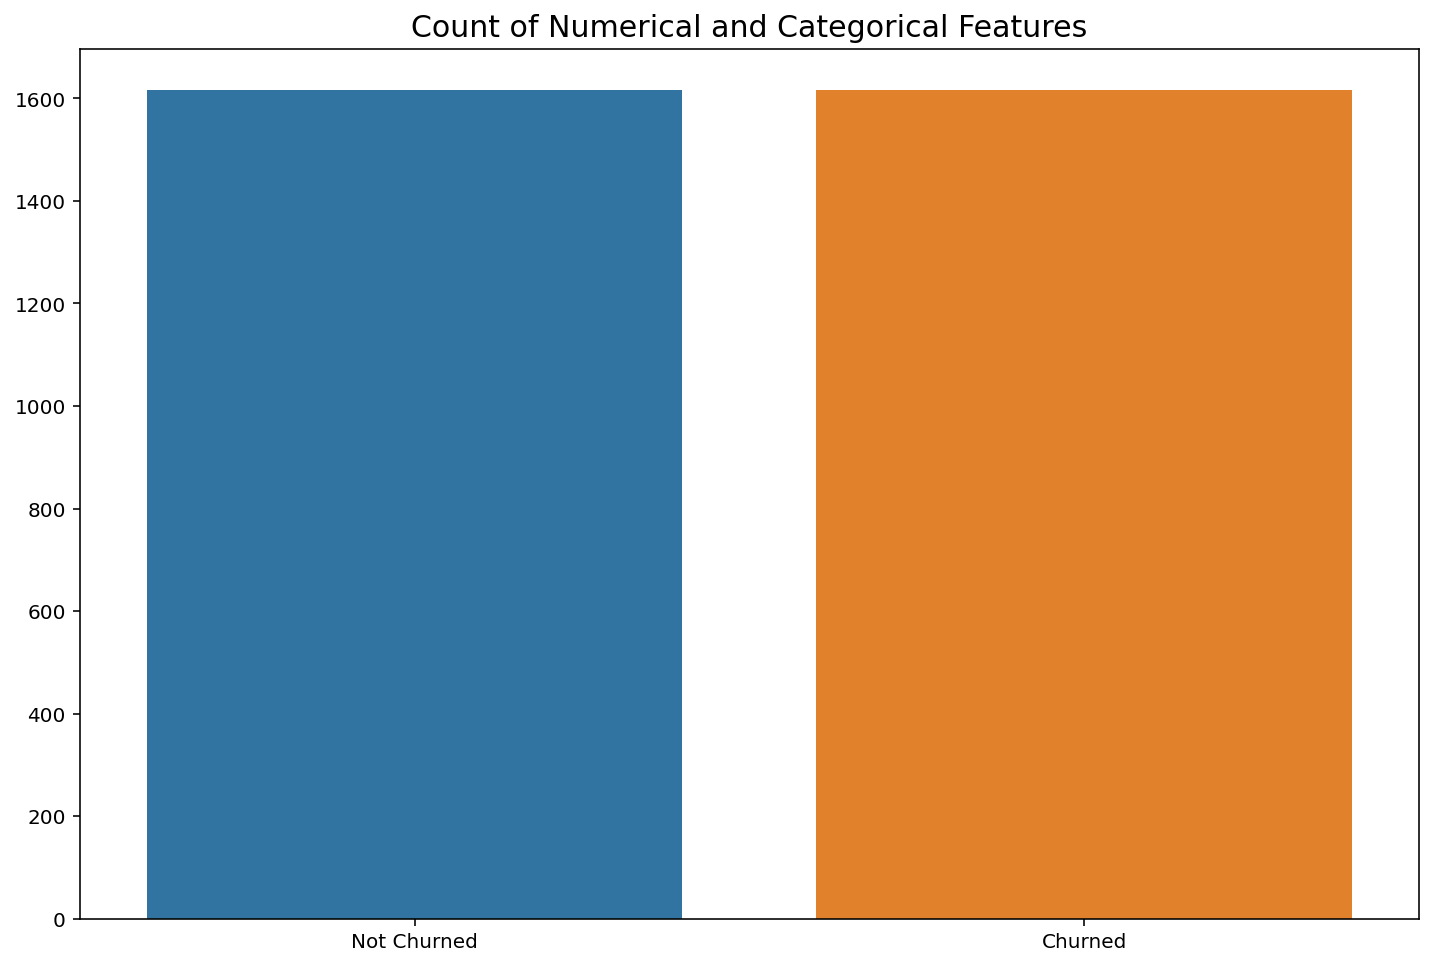

In [626]:
plt.figure(figsize=(12,8))
sns.barplot(x = ['Not Churned','Churned'],y=[len(df_resampled[df_resampled['target']==0]),len(df_resampled[df_resampled['target']==1])])
plt.title('Count of Numerical and Categorical Features',fontsize=15)
plt.show()

In [627]:
independent_var

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,28.000000,0,2,57387,1,1,0,2
1,31.000000,0,2,67016,2,2,0,1
2,43.000000,0,2,65603,2,2,0,1
3,29.000000,0,0,46368,1,1,0,1
4,31.000000,1,1,78728,3,3,0,2
...,...,...,...,...,...,...,...,...
3227,36.092825,0,1,49568,1,2,697222,2
3228,34.631453,0,0,89749,3,3,0,2
3229,30.372258,0,1,63696,2,2,0,1
3230,40.700536,0,0,52777,1,1,537460,2


In [628]:
dff=df_resampled.copy()
ind_var = dff.drop(columns=['target'])
target_var = dff['target']
num = ind_var.select_dtypes(include=np.number)
cat = ind_var.select_dtypes(include=np.object)
LE = LabelEncoder()
for i in cat.columns:
    cat[i] = LE.fit_transform(cat[i].astype(str))
    ind_var = pd.concat(objs = (num,cat),axis=1)
LE = LabelEncoder()
target_var = pd.Series(LE.fit_transform(target_var))


X_train, X_test, y_train, y_test = train_test_split(ind_var, target_var, test_size=0.2, random_state=0)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
print(f"Number of rows in train data = {X_train.shape[0]}")
print(f"Number of rows in CV data = {X_cv.shape[0]}")
print(f"Number of rows in test data = {X_test.shape[0]}")


print(f"Number of rows in train pred = {y_train.shape[0]}")
print(f"Number of rows in CV pred = {y_cv.shape[0]}")
print(f"Number of rows in test pred = {y_test.shape[0]}")

Number of rows in train data = 2068
Number of rows in CV data = 517
Number of rows in test data = 647
Number of rows in train pred = 2068
Number of rows in CV pred = 517
Number of rows in test pred = 647


In [629]:
# create model and select features
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X_train,y_train)

# view selected features
print("Num Features: %d"% fit.n_features_)
print("Selected Features: %s"% fit.support_)
print("Feature Ranking: %s"% fit.ranking_)

Num Features: 8
Selected Features: [ True  True  True  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1 1 1]


In [630]:
f= list(zip(X_train.columns,rfe.support_,rfe.ranking_))
f

[('Age', True, 1),
 ('Gender', True, 1),
 ('Education_Level', True, 1),
 ('Income', True, 1),
 ('Joining Designation', True, 1),
 ('Grade', True, 1),
 ('Total Business Value', True, 1),
 ('Quarterly Rating', True, 1)]

In [631]:
rfe_features=[]
for i in range(0,len(f)):
  if f[i][1]==True:
    rfe_features.append(f[i][0])

In [632]:
rfe_features

['Age',
 'Gender',
 'Education_Level',
 'Income',
 'Joining Designation',
 'Grade',
 'Total Business Value',
 'Quarterly Rating']

In [633]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## Model Building - BASE MODEL

Ensemble learning is a machine learning paradigm where multiple models (often called “weak learners”) are trained to solve the same problem and combined to get better results. The main hypothesis is that when weak models are correctly combined we can obtain more accurate and/or robust models.

**bagging**, that often considers homogeneous weak learners, learns them independently from each other in parallel and combines them following some kind of deterministic averaging process


**boosting**, that often considers homogeneous weak learners, learns them sequentially in a very adaptative way (a base model depends on the previous ones) and combines them following a deterministic strategy

Very roughly, we can say that bagging will mainly focus at getting an ensemble model with less variance than its components whereas boosting and stacking will mainly try to produce strong models less biased than their components (even if variance can also be reduced).

## Logistic Regression

LogisticRegression()

<Figure size 720x720 with 0 Axes>

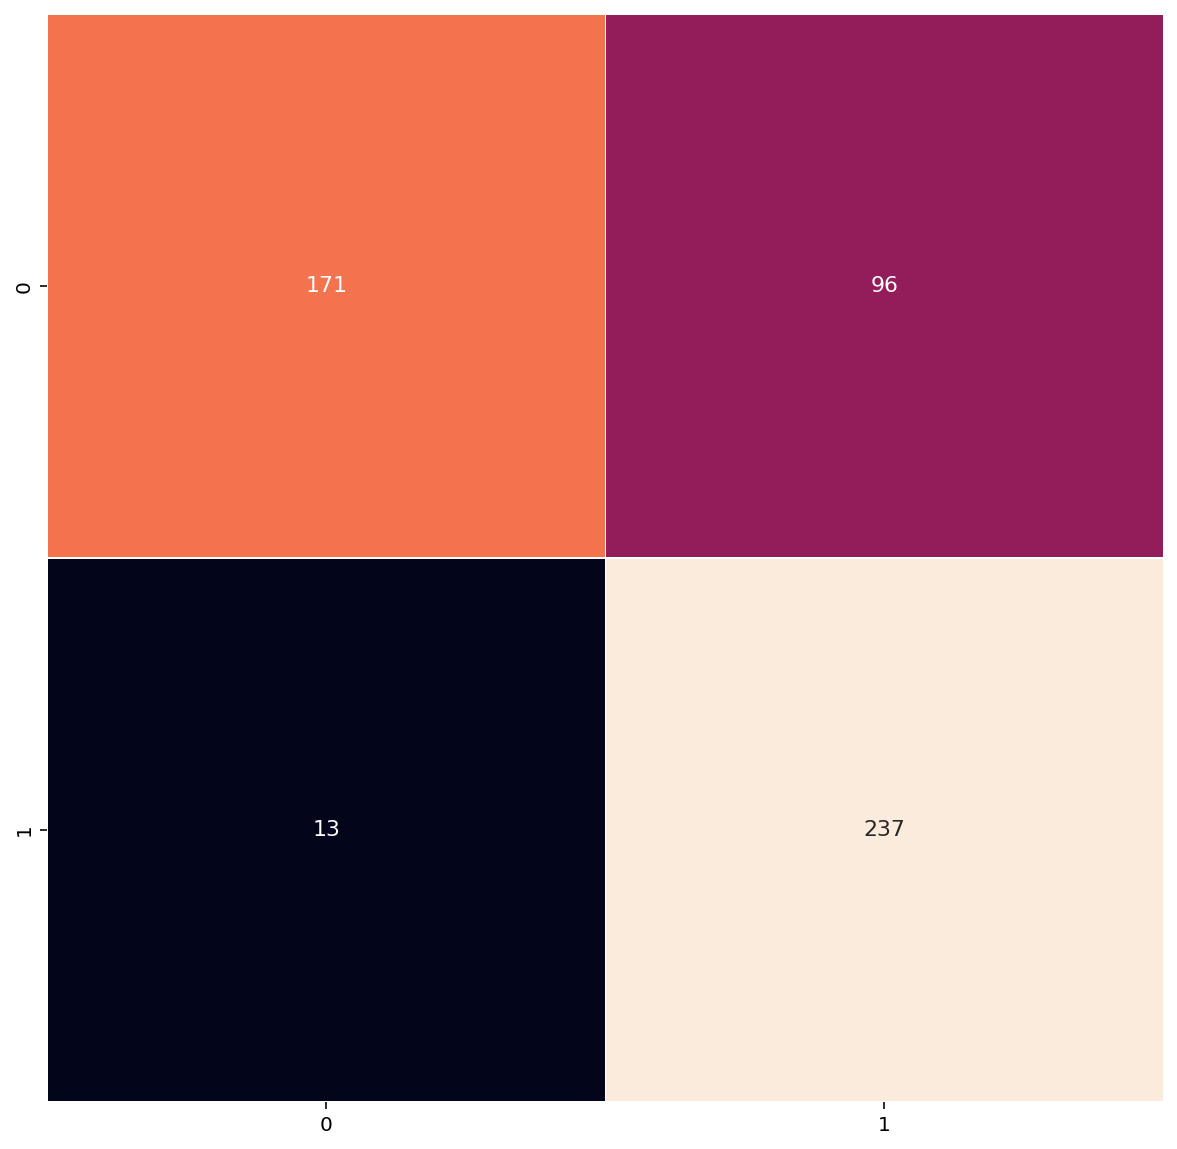

In [634]:
log_base_model=LogisticRegression()
log_base_model.fit(X_train,y_train)
baselog_predict = log_base_model.predict(X_cv)
train_log_pred_prob = log_base_model.predict_proba(X_train)
cv_log_pred_prob = log_base_model.predict_proba(X_cv)
cm = confusion_matrix(y_cv,baselog_predict)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,cbar = False,linewidths = 0.1, annot_kws = {'size':11},fmt='d')
plt.show()

In [635]:
print_score(log_base_model, X_train, y_train, X_cv, y_cv, train=True)
print_score(log_base_model, X_train, y_train, X_cv, y_cv, train=False)

Train Result:
Accuracy Score: 77.80%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.871658     0.725000  0.778046     0.798329      0.796981
recall        0.642365     0.908832  0.778046     0.775598      0.778046
f1-score      0.739648     0.806574  0.778046     0.773111      0.773726
support    1015.000000  1053.000000  0.778046  2068.000000   2068.000000
_______________________________________________
Confusion Matrix: 
 [[652 363]
 [ 96 957]]

Test Result:
Accuracy Score: 78.92%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.929348    0.711712  0.789168    0.820530      0.824108
recall       0.640449    0.948000  0.789168    0.794225      0.789168
f1-score     0.758315    0.813036  0.789168    0.785675      0.784776
support    267.000000  250.000000  0.789168  517

## Random Forest

<Figure size 720x720 with 0 Axes>

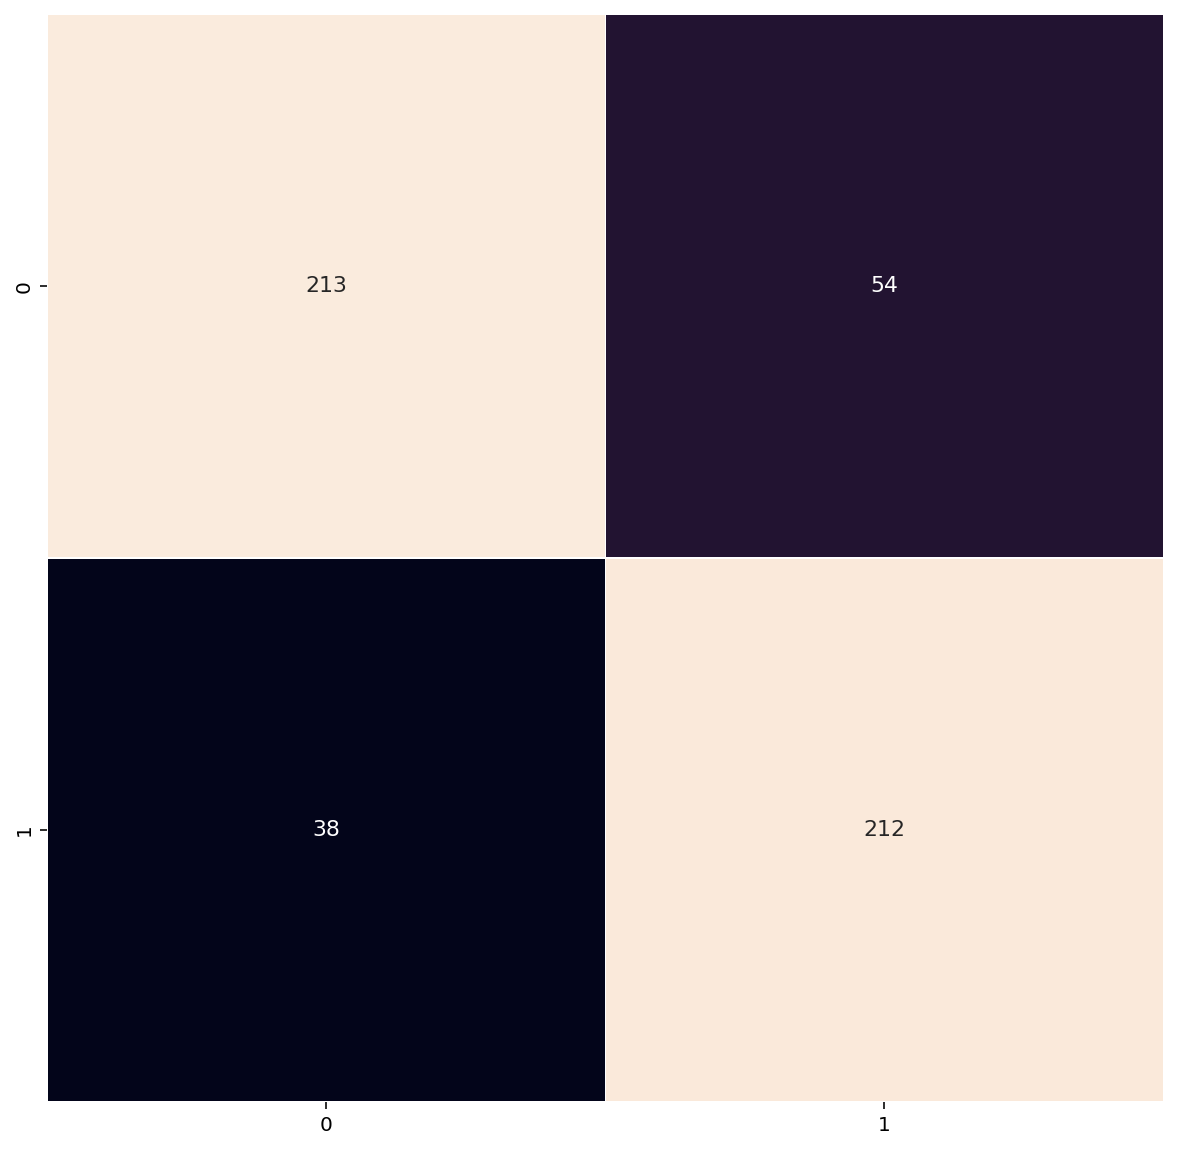

In [636]:
rf=RandomForestClassifier(random_state=10)
r_forest = rf.fit(X_train,y_train)
y_pred_Rf=r_forest.predict(X_cv)
train_pred_rf_prob = r_forest.predict_proba(X_train)
cv_pred_rf_prob = r_forest.predict_proba(X_cv)
cm_rf = confusion_matrix(y_cv,y_pred_Rf)
plt.figure(figsize=(10,10))
sns.heatmap(cm_rf,annot=True,cbar = False,linewidths = 0.1, annot_kws = {'size':11},fmt='d')
plt.show()

In [639]:
print_score(r_forest, X_train, y_train, X_cv, y_cv, train=True)
print_score(r_forest, X_train, y_train, X_cv, y_cv, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    1015.0  1053.0       1.0     2068.0        2068.0
_______________________________________________
Confusion Matrix: 
 [[1015    0]
 [   0 1053]]

Test Result:
Accuracy Score: 82.21%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.848606    0.796992   0.82205    0.822799      0.823648
recall       0.797753    0.848000   0.82205    0.822876      0.822050
f1-score     0.822394    0.821705   0.82205    0.822050      0.822061
support    267.000000  250.000000   0.82205  517.000000    517.000000
_________________________________

## Decision Tree

<Figure size 720x720 with 0 Axes>

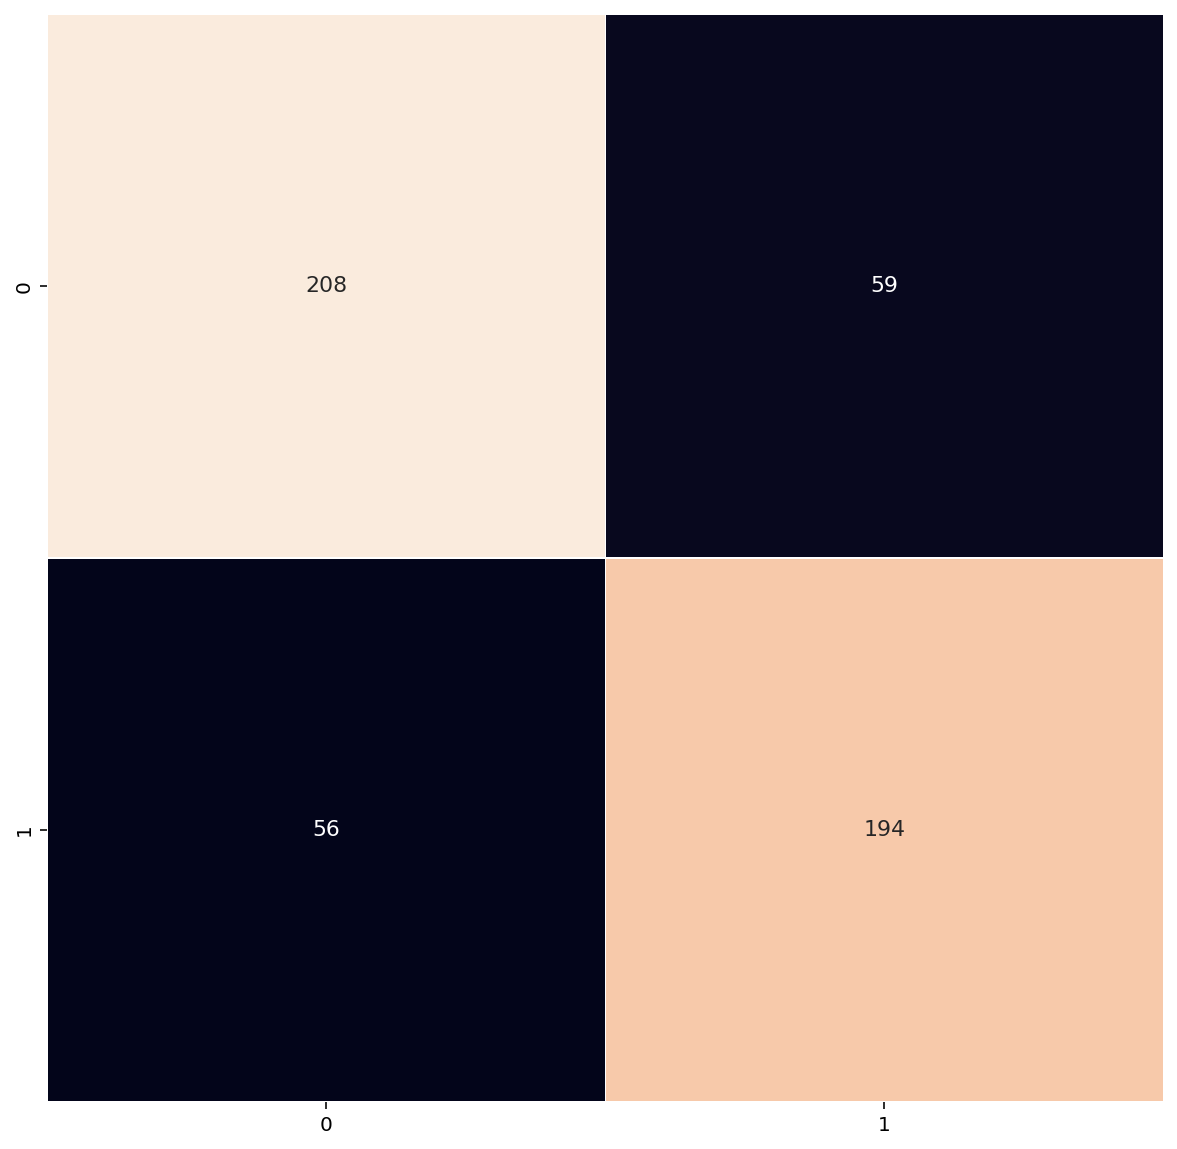

In [637]:
clf = DecisionTreeClassifier(random_state=10)
decision_tree = clf.fit(X_train,y_train)
y_pred_dt = decision_tree.predict(X_cv)
cm_dt = confusion_matrix(y_cv,y_pred_dt)
train_dt_prob = decision_tree.predict_proba(X_train)
cv_dt_prob = decision_tree.predict_proba(X_cv)
plt.figure(figsize=(10,10))
sns.heatmap(cm_dt,annot=True,cbar = False,linewidths = 0.1, annot_kws = {'size':11},fmt='d')
plt.show()

In [641]:
print_score(decision_tree, X_train, y_train, X_cv, y_cv, train=True)
print_score(decision_tree, X_train, y_train, X_cv, y_cv, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    1015.0  1053.0       1.0     2068.0        2068.0
_______________________________________________
Confusion Matrix: 
 [[1015    0]
 [   0 1053]]

Test Result:
Accuracy Score: 77.76%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.787879    0.766798  0.777563    0.777339      0.777685
recall       0.779026    0.776000  0.777563    0.777513      0.777563
f1-score     0.783427    0.771372  0.777563    0.777400      0.777598
support    267.000000  250.000000  0.777563  517.000000    517.000000
_________________________________

## Hyperparameter tuning for decision tree

In [642]:
decision_tree_classification = DecisionTreeClassifier(random_state=10)
dt = decision_tree_classification.fit(X_train,y_train)
train_dt_prob = dt.predict_proba(X_train)[:,1]
cv_dt_prob = dt.predict_proba(X_cv)[:,1]
pd.DataFrame({'Train Scores':get_train_scores(dt,train_dt_prob,X_train,y_train).values(),'CV Scores':get_cv_scores(dt,cv_dt_prob,X_cv,y_cv).values()},index=get_cv_scores(dt,cv_dt_prob,X_cv,y_cv).keys())

,Train Scores,CV Scores
Accuracy,1.0,0.78
Precision,1.0,0.78
Recall,1.0,0.78
f1-Score,1.0,0.78
Kappa Score,1.0,0.55
ROC-AUC Socre,1.0,0.78


From the Above scores of Train and test for decision tree we can see that the model is overfitted.

In [643]:
tuned_parameter = [{'criterion' : ['entropy','gini'],
                   'max_depth':[10,50,100],
                    'max_features':['sqrt','log2'],
                    'min_samples_split':[50,250,300]
                     }]
decision_tree_classification = DecisionTreeClassifier(random_state=10)
tree_grid = GridSearchCV(estimator=decision_tree_classification,param_grid=tuned_parameter,cv=5)
tree_grid_model = tree_grid.fit(X_train,y_train)
print('Best Parameters for Decision Tree : ',tree_grid_model.best_params_)

Best Parameters for Decision Tree :  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 50}


In [644]:
train_prob_dt = tree_grid_model.predict_proba(X_train)[:,1]
cv_prob_dt = tree_grid_model.predict_proba(X_cv)[:,1]
dt_results = pd.DataFrame({'Train Scores':get_train_scores(tree_grid_model,train_prob_dt,X_train,y_train).values(),'CV Scores':get_cv_scores(tree_grid_model,cv_prob_dt,X_cv,y_cv).values()},index=get_cv_scores(tree_grid_model,cv_prob_dt,X_cv,y_cv).keys())

In [645]:
dt_results

,Train Scores,CV Scores
Accuracy,0.82,0.81
Precision,0.82,0.82
Recall,0.81,0.82
f1-Score,0.82,0.81
Kappa Score,0.63,0.63
ROC-AUC Socre,0.90,0.86


## Hyperparameter tuniung for Random forest

In [646]:
random_forest=RandomForestClassifier(random_state=10)
rf = random_forest.fit(X_train,y_train)
train_pred_rf_prob = rf.predict_proba(X_train)[:,1]
cv_pred_rf_prob = rf.predict_proba(X_cv)[:,1]
pd.DataFrame({'Train Scores':get_train_scores(rf,train_pred_rf_prob,X_train,y_train).values(),'CV Scores':get_cv_scores(rf,cv_pred_rf_prob,X_cv,y_cv).values()},index=get_cv_scores(rf,cv_pred_rf_prob,X_cv,y_cv).keys())

,Train Scores,CV Scores
Accuracy,1.0,0.82
Precision,1.0,0.82
Recall,1.0,0.82
f1-Score,1.0,0.82
Kappa Score,1.0,0.64
ROC-AUC Socre,1.0,0.90


In [647]:
rf_tuned_parameter = [{'criterion' : ['entropy','gini'],
                    'n_estimators':[150,200],
                   'max_depth':[50,100],
                    'max_features':['sqrt','log2'],
                    'min_samples_split':[250,300]
                     }]

In [648]:
random_forest=RandomForestClassifier(random_state=10)
rf_grid = GridSearchCV(estimator=random_forest,param_grid=rf_tuned_parameter,cv=2)
rf_grid_model = rf_grid.fit(X_train,y_train)
print('Best Parameters:- ',rf_grid_model.best_params_)

Best Parameters:-  {'criterion': 'entropy', 'max_depth': 50, 'max_features': 'log2', 'min_samples_split': 300, 'n_estimators': 200}


In [649]:
train_pred_rf_prob = rf_grid_model.predict_proba(X_train)[:,1]
cv_pred_rf_prob = rf_grid_model.predict_proba(X_cv)[:,1]
rf_results = pd.DataFrame({'Train Scores':get_train_scores(rf_grid_model,train_pred_rf_prob,X_train,y_train).values(),'CV Scores':get_cv_scores(rf_grid_model,cv_pred_rf_prob,X_cv,y_cv).values()},index=get_cv_scores(rf_grid_model,cv_pred_rf_prob,X_cv,y_cv).keys())

In [650]:
rf_results

,Train Scores,CV Scores
Accuracy,0.80,0.81
Precision,0.81,0.83
Recall,0.80,0.82
f1-Score,0.80,0.81
Kappa Score,0.60,0.63
ROC-AUC Socre,0.87,0.87


## Implementation of Boosting Algorithms

### Adaboost

In [651]:
ada_model = AdaBoostClassifier(n_estimators=40,random_state=10)
ada_model_fit = ada_model.fit(X_train,y_train)
train_prob = ada_model_fit.predict_proba(X_train)[:,1]
test_proba = ada_model_fit.predict_proba(X_cv)[:,1]
pd.DataFrame({'Train Scores':get_train_scores(ada_model_fit,train_prob,X_train,y_train).values(),'CV Scores':get_cv_scores(ada_model_fit,test_proba,X_cv,y_cv).values()},index=get_cv_scores(ada_model_fit,test_proba,X_cv,y_cv).keys())

,Train Scores,CV Scores
Accuracy,0.81,0.80
Precision,0.83,0.81
Recall,0.81,0.80
f1-Score,0.81,0.80
Kappa Score,0.63,0.60
ROC-AUC Socre,0.89,0.87


## Hyperparameter tuning of Ada boost

In [652]:
adaboost_tuned_parameter = [{'n_estimators':[20,50,100,150]}]
ada_mod = AdaBoostClassifier(random_state=10)
ada_grid = GridSearchCV(estimator=ada_mod,param_grid=adaboost_tuned_parameter,cv=5)
ada_grid_model = ada_grid.fit(X_train,y_train)
print('Best Parameters:- ',ada_grid_model.best_params_)

Best Parameters:-  {'n_estimators': 150}


In [653]:
train_prob_ada = ada_grid_model.predict_proba(X_train)[:,1]
test_proba_ada = ada_grid_model.predict_proba(X_cv)[:,1]
ada_model_results = pd.DataFrame({'Train Scores':get_train_scores(ada_grid_model,train_prob_ada,X_train,y_train).values(),'CV Scores':get_cv_scores(ada_grid_model,test_proba_ada,X_cv,y_cv).values()},index=get_cv_scores(ada_grid_model,test_proba_ada,X_cv,y_cv).keys())

In [654]:
ada_model_results

,Train Scores,CV Scores
Accuracy,0.83,0.81
Precision,0.84,0.82
Recall,0.83,0.81
f1-Score,0.83,0.81
Kappa Score,0.66,0.62
ROC-AUC Socre,0.91,0.88


## Gradient Boosting

In [655]:
gboost_model = GradientBoostingClassifier(random_state=10)
gb_model = gboost_model.fit(X_train,y_train)
train_prob_gb = gb_model.predict_proba(X_train)[:,1]
cv_proba_gb = gb_model.predict_proba(X_cv)[:,1]
pd.DataFrame({'Train Scores':get_train_scores(gb_model,train_prob_gb,X_train,y_train).values(),'CV Scores':get_test_scores(gb_model,cv_proba_gb,X_cv,y_cv).values()},index=get_cv_scores(gb_model,cv_proba_gb,X_cv,y_cv).keys())

,Train Scores,CV Scores
Accuracy,0.86,0.83
Precision,0.87,0.84
Recall,0.86,0.83
f1-Score,0.86,0.83
Kappa Score,0.72,0.66
ROC-AUC Socre,0.93,0.91


### Hyperparameter tuning of Gradient Boosting

In [656]:
gb_tuned_parameters = [{'n_estimators': [100,150],
                        'learning_rate':[0.4,0.6]}]
gb_model_tun = GradientBoostingClassifier(random_state=10)
gb_grid = GridSearchCV(estimator=gb_model_tun,param_grid=gb_tuned_parameters,cv=2)
gb_grid_model = gb_grid.fit(X_train,y_train)
print('Best Parameters:- ',gb_grid_model.best_params_)

Best Parameters:-  {'learning_rate': 0.4, 'n_estimators': 100}


In [657]:
train_prob_gb_tun = gb_grid_model.predict_proba(X_train)[:,1]
cv_proba_gb_tun = gb_grid_model.predict_proba(X_cv)[:,1]
gb_model_results = pd.DataFrame({'Train Scores':get_train_scores(gb_grid_model,train_prob_gb_tun,X_train,y_train).values(),'CV Scores':get_cv_scores(gb_grid_model,cv_proba_gb_tun,X_cv,y_cv).values()},index=get_cv_scores(gb_grid_model,cv_proba_gb_tun,X_cv,y_cv).keys())

In [658]:
gb_model_results

,Train Scores,CV Scores
Accuracy,0.94,0.83
Precision,0.95,0.83
Recall,0.94,0.83
f1-Score,0.94,0.83
Kappa Score,0.89,0.66
ROC-AUC Socre,0.99,0.90


## XGBoost

In [659]:
xg_mod = XGBClassifier()
xgb_model = xg_mod.fit(X_train,y_train)
train_prob_xg = xgb_model.predict_proba(X_train)[:,1]
cv_proba_xg = xgb_model.predict_proba(X_cv)[:,1]
pd.DataFrame({'Train Scores':get_train_scores(xgb_model,train_prob_xg,X_train,y_train).values(),'CV Scores':get_cv_scores(xgb_model,cv_proba_xg,X_cv,y_cv).values()},index=get_cv_scores(xgb_model,cv_proba_xg,X_cv,y_cv).keys())

,Train Scores,CV Scores
Accuracy,0.84,0.83
Precision,0.85,0.84
Recall,0.84,0.83
f1-Score,0.84,0.83
Kappa Score,0.69,0.65
ROC-AUC Socre,0.92,0.90


### Hyperparameter tuning of XGBoost

In [660]:
xg_tuned_parameters = [{'gamma': [5,10],
                        'learning_rate':[0.4,0.6]}]
xg_mod_tunned = XGBClassifier()
xg_grid = GridSearchCV(estimator=xg_mod_tunned,param_grid=xg_tuned_parameters,cv=2)
xg_grid_model = xg_grid.fit(X_train,y_train)
print('Best Parameters:- ',xg_grid_model.best_params_)

Best Parameters:-  {'gamma': 5, 'learning_rate': 0.4}


In [661]:
train_prob_xg_tun = xg_grid_model.predict_proba(X_train)[:,1]
cv_proba_xg_tun = xg_grid_model.predict_proba(X_cv)[:,1]
xg_model_results = pd.DataFrame({'Train Scores':get_train_scores(xg_grid_model,train_prob_xg_tun,X_train,y_train).values(),'CV Scores':get_cv_scores(xg_grid_model,cv_proba_xg_tun,X_cv,y_cv).values()},index=get_cv_scores(xg_grid_model,cv_proba_xg_tun,X_cv,y_cv).keys())

In [662]:
xg_model_results

,Train Scores,CV Scores
Accuracy,0.83,0.82
Precision,0.84,0.84
Recall,0.83,0.83
f1-Score,0.83,0.82
Kappa Score,0.66,0.65
ROC-AUC Socre,0.90,0.89


## Final Model performance and comparison

In [663]:
final_model_report = pd.DataFrame({
                                    'Decision Tree':dt_results['CV Scores'].values,
                                    'Random Forest':rf_results['CV Scores'].values,
                                     'Ada Boost':ada_model_results['CV Scores'].values,
                                      'Gradient Boosting':gb_model_results['CV Scores'].values,
                                     'XG Boost':xg_model_results['CV Scores'].values},index=xg_model_results['CV Scores'].index)

## CV data Scores

In [664]:
final_model_report

,Decision Tree,Random Forest,Ada Boost,Gradient Boosting,XG Boost
Accuracy,0.81,0.81,0.81,0.83,0.82
Precision,0.82,0.83,0.82,0.83,0.84
Recall,0.82,0.82,0.81,0.83,0.83
f1-Score,0.81,0.81,0.81,0.83,0.82
Kappa Score,0.63,0.63,0.62,0.66,0.65
ROC-AUC Socre,0.86,0.87,0.88,0.90,0.89


## Lets Predict With Test data with the good model

## Test Data Score

In [665]:
train_pred_rf_prob = rf_grid_model.predict_proba(X_train)[:,1]
test_pred_rf_prob = rf_grid_model.predict_proba(X_test)[:,1]

In [666]:



# ----------------------
#Decision tree
train_prob_dt = tree_grid_model.predict_proba(X_train)[:,1]
test_prob_dt = tree_grid_model.predict_proba(X_test)[:,1]
dt_results = pd.DataFrame({'Train Scores':get_train_scores(tree_grid_model,train_prob_dt,X_train,y_train).values(),'Test Scores':get_test_scores(tree_grid_model,test_prob_dt,X_test,y_test).values()},index=get_test_scores(tree_grid_model,test_prob_dt,X_test,y_test).keys())

# ----------------------

#Random forest
train_pred_rf_prob = rf_grid_model.predict_proba(X_train)[:,1]
test_pred_rf_prob = rf_grid_model.predict_proba(X_test)[:,1]
rf_results = pd.DataFrame({'Train Scores':get_train_scores(rf_grid_model,train_pred_rf_prob,X_train,y_train).values(),'Test Scores':get_test_scores(rf_grid_model,test_pred_rf_prob,X_test,y_test).values()},index=get_test_scores(rf_grid_model,test_pred_rf_prob,X_test,y_test).keys())


# ----------------------
# Adaboost
train_prob_ada = ada_grid_model.predict_proba(X_train)[:,1]
test_proba_ada = ada_grid_model.predict_proba(X_test)[:,1]
ada_model_results = pd.DataFrame({'Train Scores':get_train_scores(ada_grid_model,train_prob_ada,X_train,y_train).values(),'Test Scores':get_test_scores(ada_grid_model,test_proba_ada,X_test,y_test).values()},index=get_test_scores(ada_grid_model,test_proba_ada,X_test,y_test).keys())



# ----------------------
#Gradient boost
train_prob_gb_tun = gb_grid_model.predict_proba(X_train)[:,1]
test_proba_gb_tun = gb_grid_model.predict_proba(X_test)[:,1]
gb_model_results = pd.DataFrame({'Train Scores':get_train_scores(gb_grid_model,train_prob_gb_tun,X_train,y_train).values(),'Test Scores':get_test_scores(gb_grid_model,test_proba_gb_tun,X_test,y_test).values()},index=get_test_scores(gb_grid_model,test_proba_gb_tun,X_test,y_test).keys())


# ----------------------
#XGBoost
train_prob_xg_tun = xg_grid_model.predict_proba(X_train)[:,1]
test_proba_xg_tun = xg_grid_model.predict_proba(X_test)[:,1]
xg_model_results = pd.DataFrame({'Train Scores':get_train_scores(xg_grid_model,train_prob_xg_tun,X_train,y_train).values(),'Test Scores':get_cv_scores(xg_grid_model,test_proba_xg_tun,X_test,y_test).values()},index=get_cv_scores(xg_grid_model,test_proba_xg_tun,X_test,y_test).keys())

# ----------------------
final_model_report = pd.DataFrame({
                                    'Decision Tree':dt_results['Test Scores'].values,
                                    'Random Forest':rf_results['Test Scores'].values,
                                     'Ada Boost':ada_model_results['Test Scores'].values,
                                      'Gradient Boosting':gb_model_results['Test Scores'].values,
                                     'XG Boost':xg_model_results['Test Scores'].values},index=xg_model_results['Test Scores'].index)
final_model_report


,Decision Tree,Random Forest,Ada Boost,Gradient Boosting,XG Boost
Accuracy,0.77,0.79,0.79,0.82,0.79
Precision,0.78,0.80,0.80,0.83,0.81
Recall,0.78,0.79,0.79,0.82,0.79
f1-Score,0.77,0.78,0.79,0.82,0.79
Kappa Score,0.55,0.57,0.58,0.64,0.58
ROC-AUC Socre,0.83,0.87,0.87,0.90,0.87


## ROC AUC CURVE FOR Gradient Boosting

We can clearly see from the scores that the Score of Gradient boost is high and hence we can see the ROC AUC Curve of the model

<Figure size 720x432 with 0 Axes>

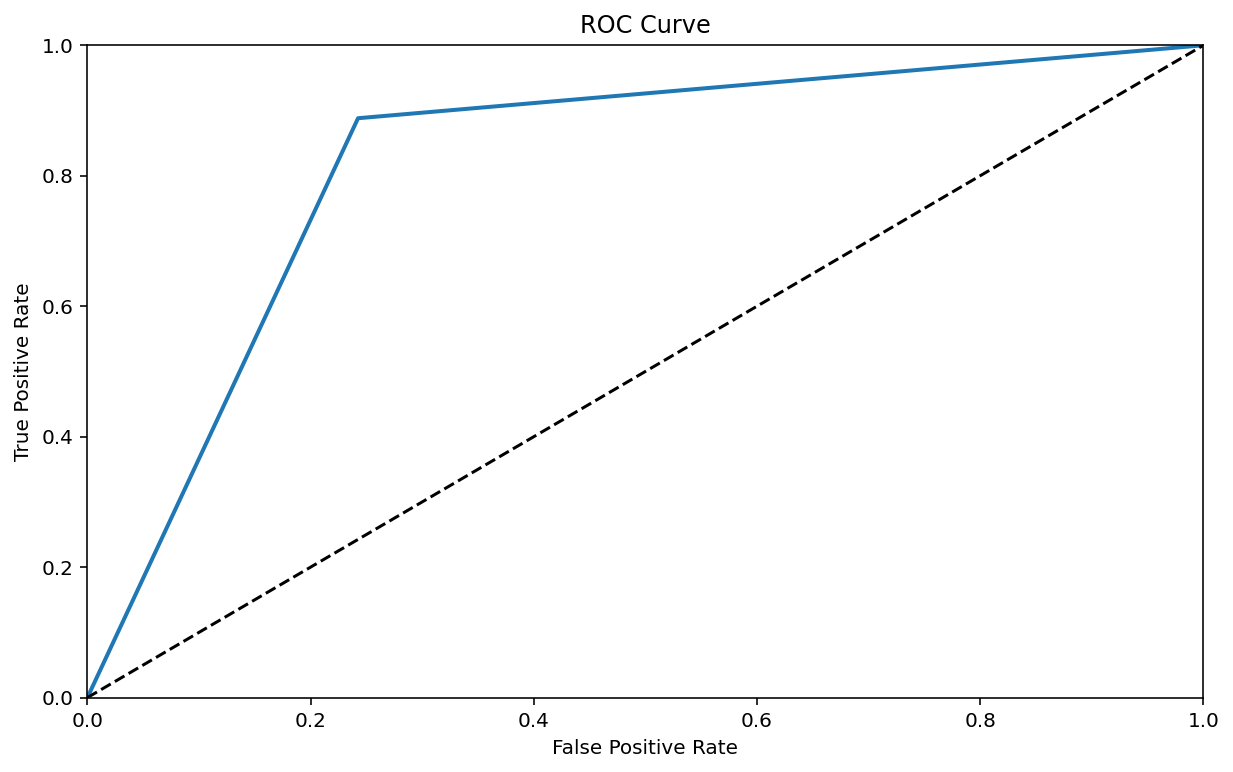

<Figure size 720x432 with 0 Axes>

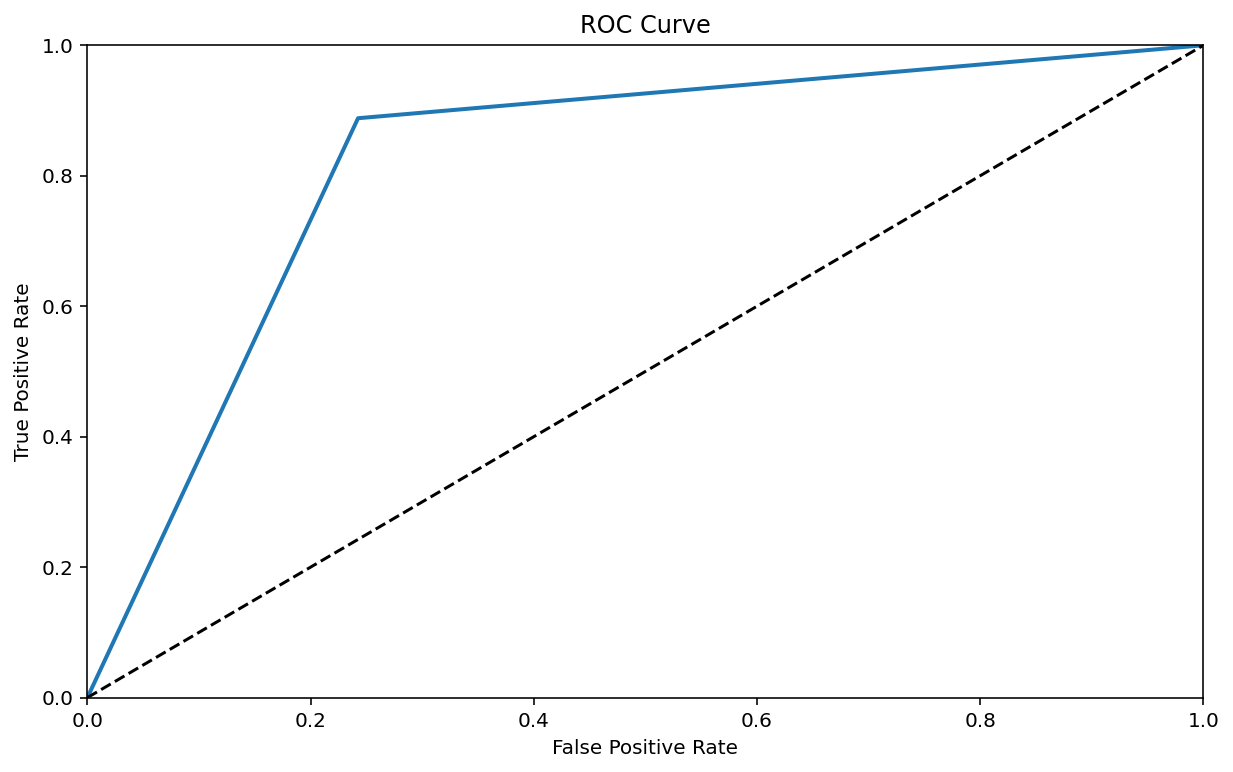

<Figure size 720x432 with 0 Axes>

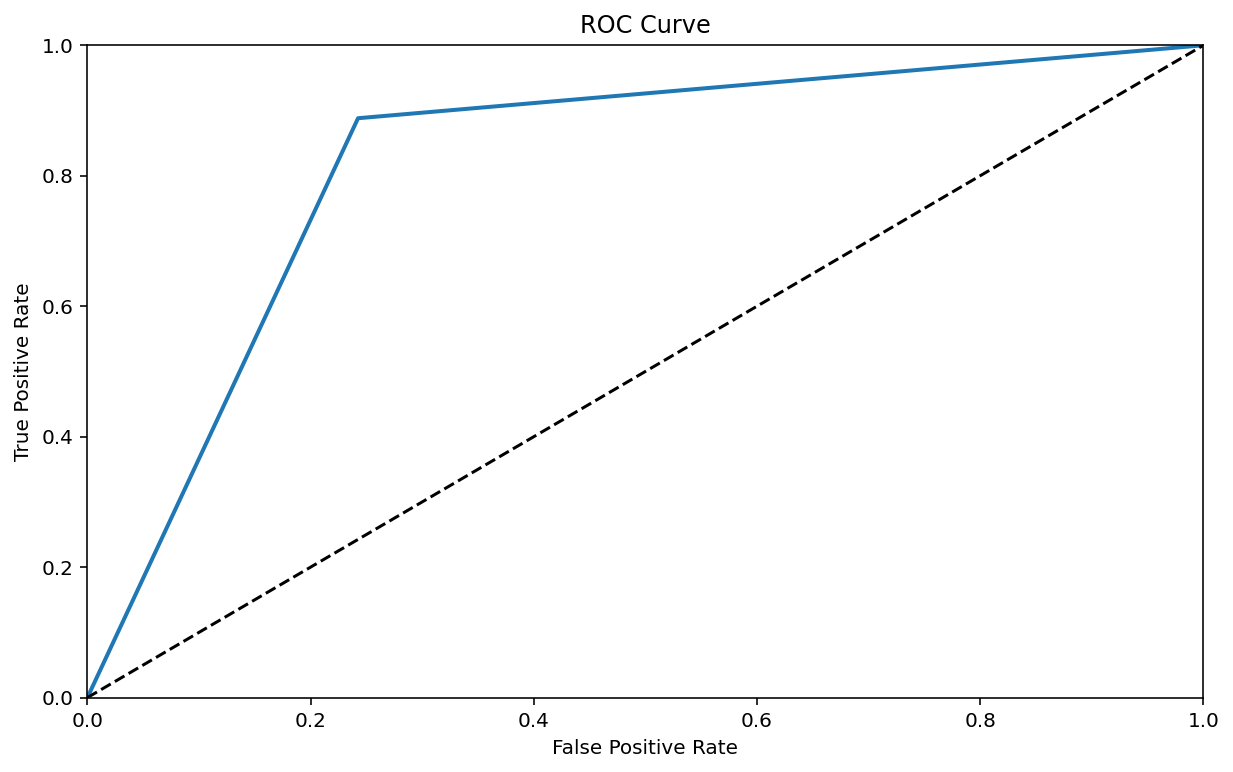

<Figure size 720x432 with 0 Axes>

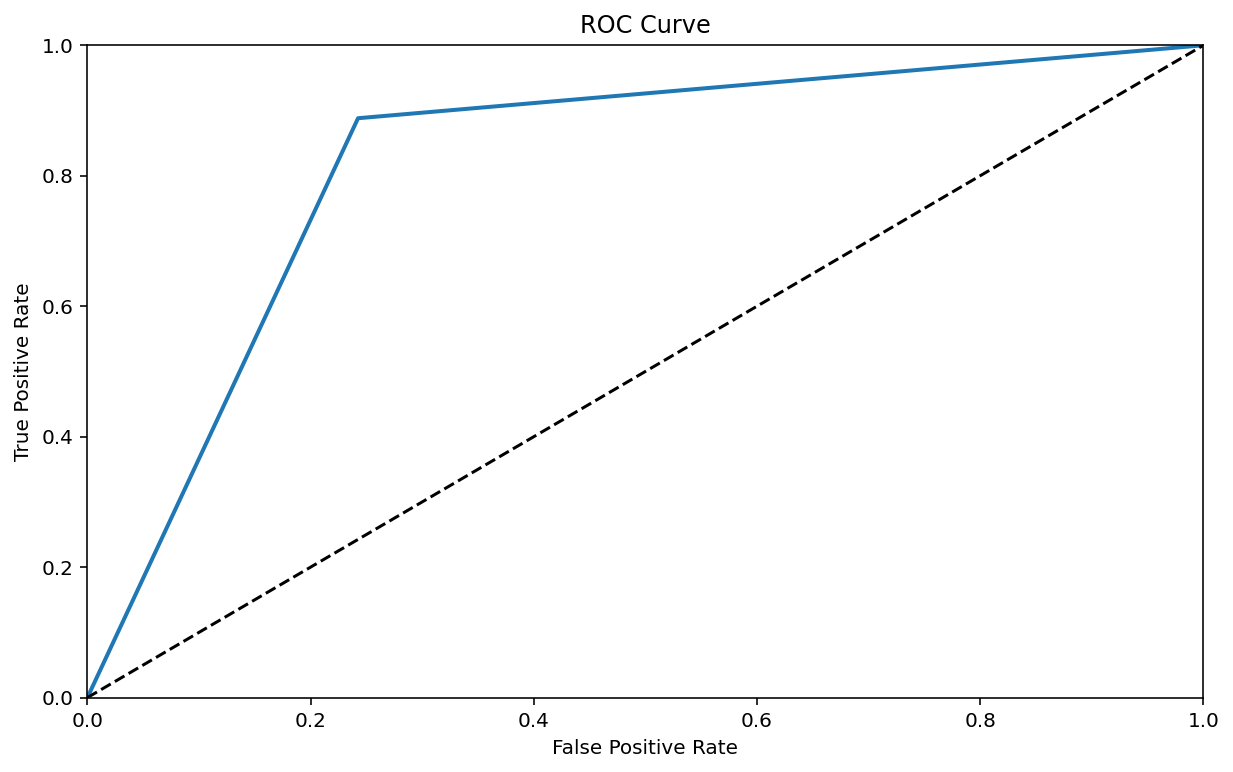

<Figure size 720x432 with 0 Axes>

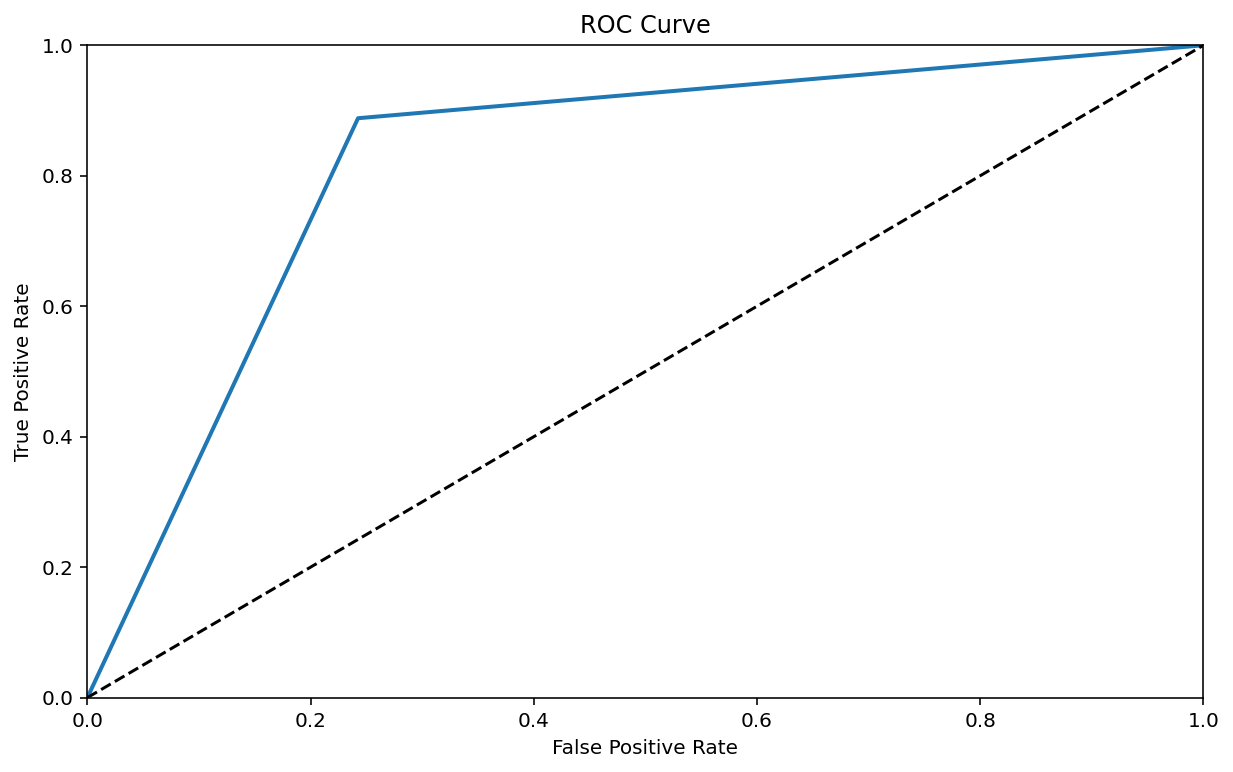

In [672]:
from sklearn.metrics import roc_curve
models=['tree_grid_model','rf_grid_model','ada_grid_model','gb_grid_model','xg_grid_model']

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

for i in models:
  fpr, tpr, thresholds = roc_curve(y_test, gb_grid_model
                                 .predict(X_test))
  plt.figure(figsize=(10,6)); 
  plot_roc_curve(fpr, tpr)
  plt.show();

An ROC AUC score of 0.90 indicates that the Gradient Boosting model has a very good ability to distinguish between positive and negative classes. An AUC score of 0.5 represents a model with random guessing, and an AUC score of 1 represents a perfect classifier

# OBSERVATIONS

- The dataset has 19104 rows and 14 columns
- We can see that the Driver Id ,is not necessary for the feature selection
- We can create target feature based on the last working day
- There are very little outliers present , and it can’t be removed ,as we have less data after diverID aggregation
- There are more no of 1 class Quarterly Rating present
- There are more Grade 1 present in dataset
- There are type 1 Designation present more in dataset
- There are more C20 city category present in dataset
- we can clearly see that the Quarterly Rating is totally dependent on the Total Business value. 
- And also we can see that the Grade is correlated to Joining Designation and income. And Income is correlated to Education level
- WE can seethe the C20 has more churn rate
- Also Education level 1 has less churn rate 
- Also the class is imbalance and hence we can use SMOTE to balance the dataset


# RECOMMENDATIONS

- Gradient boosting has high score with comparison to all other models, as tested with CV data and test data
- A score of 0.90 suggests that the model is performing significantly better than random chance, and is able to make accurate predictions with a high degree of confidence.
- However, it is important to note that the optimal threshold for classification may vary depending on the specific problem and use case.
- It is also worth considering the trade-off between accuracy and interpretability in the context of Gradient Boosting models. While Gradient Boosting can provide very accurate prediction, 
- it can also be a complex model that may be difficult to interpret and may require more computational resources to train than other models.
- Also we need more features , and data for finding the better model